In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_1.csv
/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_LIST_EVENTS.csv
/kaggle/input/unsw-nb15/UNSW-NB15_4.csv
/kaggle/input/unsw-nb15/UNSW-NB15_3.csv
/kaggle/input/unsw-nb15/UNSW-NB15_2.csv
/kaggle/input/unsw-nb15/NUSW-NB15_features.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/kaggle/input/network-intrusion-da

# NSL-KDD

In [ ]:
## NSL-KDD
train_data = pd.read_csv('/kaggle/input/nslkdd/KDDTrain+.txt', header=None)
test_data = pd.read_csv('/kaggle/input/nslkdd/KDDTest+.txt', header=None)

In [ ]:
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
           'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
           'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate', 'attack', 'level']

train_data.columns = columns
test_data.columns = columns

In [ ]:
full_data = pd.concat([train_data, test_data], ignore_index=True)

nsl_kdd_data = full_data

In [ ]:
nsl_kdd_data

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
148512         0           tcp      smtp   SF        794        333     0   
148513         0           tcp      http   SF        317        938     0   
148514         0           tcp      http   SF      54540       8314     0   
148515         0           udp  domain_u   SF         42         42     0   
148516         0           tcp    sunrpc  REJ          0          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                    0       0    0  ...                    0.17   
1                    0       0    0  ...                    0.00   
2                    0       0    0  ...                    0.10   
3                    0       0    0  ...                    1.00   
4                    0       0    0  ...                    1.00   
...                ...     ...  ...  ...                     ...   
148512               0       0    0  ...                    0.72   
148513               0       0    0  ...                    1.00   
148514               0       0    2  ...                    1.00   
148515               0       0    0  ...                    0.99   
148516               0       0    0  ...                    0.08   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                         0.03                         0.17   
1                         0.60                         0.88   
2                         0.05                         0.00   
3                         0.00                         0.03   
4                         0.00                         0.00   
...                        ...                          ...   
148512                    0.06                         0.01   
148513                    0.00                         0.01   
148514                    0.00                         0.00   
148515                    0.01                         0.00   
148516                    0.03                         0.00   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  0.00   
2                              0.00                  1.00   
3                              0.04                  0.03   
4                              0.00                  0.00   
...                             ...                   ...   
148512                         0.01                  0.01   
148513                         0.01                  0.01   
148514                         0.00                  0.00   
148515                         0.00                  0.00   
148516                         0.00                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                  0.05   
1                           0.00                  0.00   
2                           1.00                  0.00   
3                           0.01                  0.00   
4                           0.00                  0.00   
...                          ...                   ...   
148512                      0.00                  0.00   
148513                      0.00                  0.00   
148514                      0.00                  0.07   
148515                      0.00                  0.00   
148516                      0.00                  0.44   

        dst_host_srv_rerror_rate   attack  level  
0                           

In [ ]:
# X = full_data.drop(['attack', 'level'], axis=1)
# y = full_data['attack']

In [ ]:
# Get the count of each class in the 'attack' column
class_counts = nsl_kdd_data['attack'].value_counts()

# Print the counts for each class
print("Class counts:\n", class_counts)

# Compute the total sum of all counts
total_count = class_counts.sum()
print("\nTotal count of all classes:", total_count)


Class counts:
 attack
normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
ftp_write             11
loadmodule            11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udp

In [ ]:
nsl_kdd_data['attack'].value_counts()/len(nsl_kdd_data)

attack
normal             0.518823
neptune            0.308860
satan              0.029411
ipsweep            0.025182
smurf              0.022294
portsweep          0.020792
nmap               0.010544
back               0.008854
guess_passwd       0.008645
mscan              0.006706
warezmaster        0.006491
teardrop           0.006087
warezclient        0.005993
apache2            0.004962
processtable       0.004612
snmpguess          0.002229
saint              0.002148
mailbomb           0.001973
pod                0.001629
snmpgetattack      0.001199
httptunnel         0.000896
buffer_overflow    0.000337
land               0.000168
multihop           0.000168
rootkit            0.000155
named              0.000114
ps                 0.000101
sendmail           0.000094
xterm              0.000088
imap               0.000081
ftp_write          0.000074
loadmodule         0.000074
xlock              0.000061
phf                0.000040
perl               0.000034
xsnoop       

In [ ]:
labels_dict = {"normal":0, "neptune":1} #assuming 2 - all other attacks
nsl_kdd_data['attack'] = nsl_kdd_data['attack'].apply(lambda x: labels_dict.get(x, 2)).astype(np.int32)
nsl_kdd_data['attack'].value_counts()/len(nsl_kdd_data)

attack
0    0.518823
1    0.308860
2    0.172317
Name: count, dtype: float64

In [ ]:
nsl_kdd_data.drop(columns=['level'], inplace=True)

In [ ]:
nsl_kdd_data['attack'].unique()

array([0, 1, 2], dtype=int32)

In [ ]:
# nsl_kdd_data.drop(columns=['attack'], inplace=True)

# UNSW-NB15

In [ ]:
root = "/kaggle/input/unsw-nb15/"
train = pd.read_csv(root+"UNSW_NB15_training-set.csv")
test = pd.read_csv(root+"UNSW_NB15_testing-set.csv")
list_events = pd.read_csv(root+"UNSW-NB15_LIST_EVENTS.csv")
features = pd.read_csv(root+"NUSW-NB15_features.csv", encoding='cp1252')

In [ ]:
# Creating a empty dict, where I will save all parameters required for test data transformation
saved_dict = {}
# Reading datasets
dfs = []
for i in range(1,5):
    path = root+'UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None))
all_data = pd.concat(dfs).reset_index(drop=True)  # Concat all to a single df
# This csv file contains names of all the features
df_col = pd.read_csv(root+'NUSW-NB15_features.csv', encoding='ISO-8859-1')
# Making column names lower case, removing spaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())
# Renaming our dataframe with proper column names
all_data.columns = df_col['Name']
# Saving useful info, later this will be used to transform raw test data
saved_dict['columns'] = df_col['Name'][df_col['Name']!='label'].tolist()
del df_col

<ipython-input-14-6dfda817f5d4>:7: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))
<ipython-input-14-6dfda817f5d4>:7: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# We will remove all high corrlated features except ('sbytes', 'dbytes'), since we need them in feature engineering
todrop = ['sloss', 'dloss', 'dwin', 'ct_src_dport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_srv_dst']

# removing the features from our data
all_data.drop(columns=todrop, inplace=True)
# creating new features
all_data['network_bytes'] = all_data['sbytes'] + all_data['dbytes']

# Dropping columns which are not useful for the classification
# attack_cat is for multiclass classification
all_data.drop(['attack_cat'], axis=1, inplace=True)

# Onehot Encoding
service_ = OneHotEncoder()
proto_ = OneHotEncoder()
state_ = OneHotEncoder()
ohe_service = service_.fit(all_data.service.values.reshape(-1,1))
ohe_proto = proto_.fit(all_data.proto.values.reshape(-1,1))
ohe_state = state_.fit(all_data.state.values.reshape(-1,1))

# We are onehot encoding the given column
# Remove the original categorical column
for col, ohe in zip(['proto', 'service', 'state'], [ohe_proto, ohe_service, ohe_state]):
    x = ohe.transform(all_data[col].values.reshape(-1,1))
    tmp_df = pd.DataFrame(x.todense(), columns=[col+'_'+i for i in ohe.categories_[0]])
    all_data = pd.concat([all_data.drop(col, axis=1), tmp_df], axis=1)
all_data.head()

srcip  sport          dstip dsport       dur  sbytes  dbytes  sttl  \
0  59.166.0.0   1390  149.171.126.6     53  0.001055     132     164    31   
1  59.166.0.0  33661  149.171.126.9   1024  0.036133     528     304    31   
2  59.166.0.6   1464  149.171.126.7     53  0.001119     146     178    31   
3  59.166.0.5   3593  149.171.126.5     53  0.001209     132     164    31   
4  59.166.0.3  49664  149.171.126.0     53  0.001169     146     178    31   

   dttl         sload  ...  state_INT  state_MAS  state_PAR  state_REQ  \
0    29  500473.93750  ...        0.0        0.0        0.0        0.0   
1    29   87676.08594  ...        0.0        0.0        0.0        0.0   
2    29  521894.53130  ...        0.0        0.0        0.0        0.0   
3    29  436724.56250  ...        0.0        0.0        0.0        0.0   
4    29  499572.25000  ...        0.0        0.0        0.0        0.0   

   state_RST  state_TST  state_TXD  state_URH  state_URN  state_no  
0        0.0        0.0        0.0        0.0        0.0       0.0  
1        0.0        0.0        0.0        0.0        0.0       0.0  
2        0.0        0.0        0.0        0.0        0.0       0.0  
3        0.0        0.0        0.0        0.0        0.0       0.0  
4        0.0        0.0        0.0        0.0        0.0       0.0  

[5 rows x 203 columns]

In [ ]:
all_data['label']

0          0
1          0
2          0
3          0
4          0
          ..
2540042    0
2540043    0
2540044    0
2540045    0
2540046    1
Name: label, Length: 2540047, dtype: int64

In [ ]:
all_data['label'].value_counts()/len(all_data)

label
0    0.873513
1    0.126487
Name: count, dtype: float64

# KDD CUP 99

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import MinMaxScaler
print(os.listdir('../input/kdd-cup-1999-data'))

['kddcup.data.gz', 'kddcup.data', 'kddcup.testdata.unlabeled', 'training_attack_types', 'kddcup.data.corrected', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'corrected', 'kddcup.testdata.unlabeled.gz', 'kddcup.testdata.unlabeled_10_percent', 'corrected.gz', 'kddcup.newtestdata_10_percent_unlabeled', 'kddcup.data_10_percent.gz', 'kddcup.names', 'kddcup.data_10_percent_corrected', 'typo-correction.txt', 'kddcup.data_10_percent', 'kddcup.testdata.unlabeled_10_percent.gz']


In [ ]:
with open("../input/kdd-cup-1999-data/kddcup.names",'r') as f:
    print(f.read())

cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [ ]:
path = "../input/kdd-cup-1999-data/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                     1.0   
1               0       0    0  ...                     1.0   
2               0       0    0  ...                     1.0   
3               0       0    0  ...                     1.0   
4               0       0    0  ...                     1.0   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.11   
1                     0.0                         0.05   
2                     0.0                         0.03   
3                     0.0                         0.03   
4                     0.0                         0.02   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   0.0   
3                          0.0                   0.0   
4                          0.0                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

    target  Attack Type  
0  normal.       normal  
1  normal.       normal  
2  normal.       normal  
3  normal.       normal  
4  normal.       normal  

[5 rows x 43 columns]

In [ ]:
df['target'].value_counts()

target
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [ ]:
df['Attack Type'].value_counts()

Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

In [ ]:
kdd_cup_df = df

# CICD-2017

In [ ]:
import pandas as pd
# df1=pd.read_csv('/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
# df2=pd.read_csv('/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
# df3=pd.read_csv('/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv')
# df4=pd.read_csv('/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv')
# df5=pd.read_csv('/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv')
# df6=pd.read_csv('/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
# df7=pd.read_csv('/kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv')
cicd2017 = pd.read_csv('/kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv')

# cicd2017 = pd.concat([df1, df2, df3,df4,df5,df6,df7], ignore_index=True)

In [ ]:
cicd2017[' Label'].unique()

array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed'], dtype=object)

# Utils and Pipeline Functions

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

def preprocess_data(dataframe):
    # Ensure the input is a DataFrame
    df = pd.DataFrame(dataframe)

    # Separate numeric and categorical columns
    numeric_cols = df.select_dtypes(include=["number"]).columns
    categorical_cols = df.select_dtypes(exclude=["number"]).columns

    # # Replace infinite values with NaN
    df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

    # # Handle missing values for numeric columns
    # if not numeric_cols.empty:
    #     num_imputer = SimpleImputer(strategy="mean")
    #     df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

    # Drop rows with missing values
    df = df.dropna(subset=numeric_cols)  # Drop rows where any numeric column has NaN
    df = df.dropna(subset=categorical_cols)  # Drop rows where any categorical column has NaN

    # Handle missing values for categorical columns (if present)
    if not categorical_cols.empty:
        # Fill missing values
        # cat_imputer = SimpleImputer(strategy="most_frequent")
        # df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

        # Convert categorical columns to strings for uniformity
        df[categorical_cols] = df[categorical_cols].astype(str)

        # Encode categorical features
        label_encoders = {}
        for col in categorical_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le  # Save encoder for inverse transformations

    # Return the preprocessed DataFrame and optional encoders
    return df


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_curve_multi_class(test_y, probas, class_names):
    """
    Plots a single ROC curve for multi-class classification by averaging probabilities.

    Args:
    - test_y: True labels (array-like), shape (n_samples,)
    - probas: Predicted probabilities, shape (n_samples, n_classes)
    - class_names: List of class names (or labels)
    """
    # Binarize the true labels for multi-class
    lb = label_binarize(test_y, classes=range(len(class_names)))  # shape: (n_samples, n_classes)

    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(lb[:, i], probas[:, i])  # Compute for each class
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(lb.ravel(), probas.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and AUC
    # Aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))

    # Interpolate all ROC curves
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(class_names)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Average and compute AUC
    mean_tpr /= len(class_names)
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(
        fpr["micro"], tpr["micro"],
        label=f"Micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color='deeppink', linestyle=':', linewidth=1,
    )

    plt.plot(
        fpr["macro"], tpr["macro"],
        label=f"Macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
        color='navy', linestyle='-', linewidth=1,
    )

    for i, class_name in enumerate(class_names):
        plt.plot(
            fpr[i], tpr[i], lw=1,
            label=f"ROC curve of class {class_name} (AUC = {roc_auc[i]:.2f})"
        )

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

In [ ]:
!pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.2.0+cpu.html
!pip install torch-geometric

import torch
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
import torch.nn.functional as F

Looking in links: https://data.pyg.org/whl/torch-2.2.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.1/508.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.0/770.0 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.9/213.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_cluster/_version_cpu.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_spline_conv/_version_cpu.so: undefined symbol: _ZN5t

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import SVC, OneClassSVM
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GATConv, GraphSAGE
from torch.optim import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tracemalloc
from torch.optim import Adam
from torch.nn import Module

from torch_geometric.nn import (
    GCNConv, GATConv, GraphSAGE, TransformerConv,
    CGConv, GINConv, PANConv, FiLMConv,
    SuperGATConv, ClusterGCNConv, ARMAConv, DNAConv,
    global_add_pool, global_mean_pool
)
from torch_geometric.data import Data, DataLoader
from torch_geometric.utils import dropout_adj, to_dense_adj
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score

# -----------------------------
# Additional GNN Model Classes
# -----------------------------

class GIN(torch.nn.Module):
    """Graph Isomorphism Network with 3 GINConv layers"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(GIN, self).__init__()
        nn1 = torch.nn.Sequential(
            torch.nn.Linear(input_dim, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, hidden_dim)
        )
        self.conv1 = GINConv(nn1)
        nn2 = torch.nn.Sequential(
            torch.nn.Linear(hidden_dim, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, hidden_dim)
        )
        self.conv2 = GINConv(nn2)
        self.conv3 = GINConv(torch.nn.Linear(hidden_dim, output_dim))

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()


class SuperGAT(torch.nn.Module):
    """SuperGAT with 3 attention layers"""
    def __init__(self, input_dim, hidden_dim, output_dim=1, heads=2):
        super(SuperGAT, self).__init__()
        self.conv1 = SuperGATConv(input_dim, hidden_dim, heads=heads)
        self.conv2 = SuperGATConv(hidden_dim*heads, hidden_dim, heads=1)
        self.conv3 = SuperGATConv(hidden_dim, output_dim, heads=1)

    def forward(self, x, edge_index):
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()

class ClusterGCN(torch.nn.Module):
    """Cluster-GCN with 3 convolutional layers"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(ClusterGCN, self).__init__()
        self.conv1 = ClusterGCNConv(input_dim, hidden_dim)
        self.conv2 = ClusterGCNConv(hidden_dim, hidden_dim)
        self.conv3 = ClusterGCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()

class ARMA(torch.nn.Module):
    """ARMA model with 3 convolutional layers"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(ARMA, self).__init__()
        self.conv1 = ARMAConv(input_dim, hidden_dim, num_stacks=3, num_layers=2)
        self.conv2 = ARMAConv(hidden_dim, hidden_dim, num_stacks=3, num_layers=2)
        self.conv3 = ARMAConv(hidden_dim, output_dim, num_stacks=3, num_layers=2)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()

class HybridGNN(torch.nn.Module):
    """Combines features from different architectures"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(HybridGNN, self).__init__()
        self.gat = GATConv(input_dim, hidden_dim)
        self.sage = GraphSAGE(hidden_dim, hidden_dim)
        self.arma = ARMAConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.elu(self.gat(x, edge_index))
        x = F.elu(self.sage(x, edge_index))
        return self.arma(x, edge_index).squeeze()

# -----------------------------
# Standardized GCN Model
# -----------------------------
class GCN(torch.nn.Module):
    """Three-layer Graph Convolutional Network"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()

# -----------------------------
# Standardized GAT Model
# -----------------------------
class GAT(torch.nn.Module):
    """Three-layer Graph Attention Network"""
    def __init__(self, input_dim, hidden_dim, output_dim=1, heads=4):
        super(GAT, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim, heads=heads)
        self.conv2 = GATConv(hidden_dim*heads, hidden_dim, heads=1)
        self.conv3 = GATConv(hidden_dim, output_dim, heads=1)

    def forward(self, x, edge_index):
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()

class CAGN_GAT_Fusion(torch.nn.Module):
    """Hybrid of CAGN and GAT components"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(CAGN_GAT_Fusion, self).__init__()
        self.cagn_conv1 = GATConv(input_dim, hidden_dim, heads=8)
        self.gat_conv2 = GATConv(hidden_dim*8, hidden_dim, heads=4)
        self.final_conv = GATConv(hidden_dim*4, output_dim, heads=1)

    def forward(self, x, edge_index):
        x = F.relu(self.cagn_conv1(x, edge_index))
        x = F.elu(self.gat_conv2(x, edge_index))
        return self.final_conv(x, edge_index).squeeze()

In [ ]:
import numpy as np
import pandas as pd
# Import necessary libraries for the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
import torch
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import SVC, OneClassSVM
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GATConv, GraphSAGE
from torch.optim import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tracemalloc
import torch
import torch.nn.functional as F
from torch.optim import Adam
from torch.nn import Module

# -----------------------------
# Novel GNN Model: CAGN (Contrastive Attentive Graph Network)
# -----------------------------
class CAGN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, heads=8):
        super(CAGN, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim, heads=heads)
        self.conv2 = GATConv(hidden_dim * heads, hidden_dim, heads=1)
        self.conv3 = GATConv(hidden_dim, output_dim, heads=1)
        self.contrastive_loss_weight = 0.5  # Hyperparameter

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)

    def contrastive_loss(self, z, labels, margin=1.0):
        # Simplified contrastive loss: Pull same-class nodes closer, push others apart
        norm_z = F.normalize(z, p=2, dim=1)
        sim_matrix = torch.mm(norm_z, norm_z.t())  # Cosine similarity
        pos_mask = (labels.unsqueeze(1) == labels.unsqueeze(0)).float()
        neg_mask = 1 - pos_mask
        pos_loss = (1 - sim_matrix) * pos_mask
        neg_loss = F.relu(sim_matrix - margin) * neg_mask
        return (pos_loss + neg_loss).mean()


    def train_model(self, data, epochs=300, lr=0.001):
        optimizer = Adam(self.parameters(), lr=lr)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
        self.train()
        for epoch in range(epochs):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            class_names = train_y.unique()
            if len(class_names) == 2:
                cls_loss = F.binary_cross_entropy_with_logits(out[data.train_mask].squeeze(), data.y[data.train_mask].float())
            else:
                cls_loss = F.cross_entropy(out[data.train_mask].squeeze(), data.y[data.train_mask].long())
            contrast_loss = self.contrastive_loss(out, data.y)
            total_loss = cls_loss + self.contrastive_loss_weight * contrast_loss
            total_loss.backward()
            optimizer.step()
            scheduler.step()
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {total_loss.item()}")


# Novel GNN Model: Multi-Scale Hierarchical GAT with Contrastive Learning

class MultiScaleGAT(Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        """
        Multi-Scale Hierarchical GAT with Contrastive Learning.

        Args:
            input_dim (int): Input feature dimension.
            hidden_dim (int): Hidden layer dimension.
            output_dim (int): Output dimension (1 for binary classification).
        """
        super(MultiScaleGAT, self).__init__()
        self.gat1 = GATConv(input_dim, hidden_dim, heads=4, concat=True)
        self.gat2 = GATConv(hidden_dim * 4, hidden_dim, heads=2, concat=False)
        self.gat3 = GraphSAGE(in_channels=hidden_dim, hidden_channels=128, out_channels=hidden_dim, num_layers=2)
        self.contrastive_proj = torch.nn.Linear(hidden_dim, hidden_dim)
        self.classifier = torch.nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x, edge_index):
        """
        Forward pass for the model.

        Args:
            x (torch.Tensor): Node feature matrix.
            edge_index (torch.Tensor): Graph edge indices.

        Returns:
            torch.Tensor: Output logits.
        """
        x1 = F.leaky_relu(self.gat1(x, edge_index))
        x2 = F.leaky_relu(self.gat2(x1, edge_index))
        x3 = F.leaky_relu(self.gat3(x2, edge_index))
        x_combined = torch.cat([x2, x3], dim=1)  # Combine multi-scale features
        return self.classifier(x_combined)  # Return raw logits (no sigmoid here)

    def contrastive_loss(self, z, margin=2.0):
        """
        Contrastive loss to separate normal and attack nodes.

        Args:
            z (torch.Tensor): Node embeddings.
            margin (float): Margin for contrastive loss.

        Returns:
            torch.Tensor: Contrastive loss value.
        """
        norm_z = F.normalize(z, p=2, dim=1)
        sim_matrix = torch.mm(norm_z, norm_z.t())  # Cosine similarity
        y = self.data.y
        pos_mask = (y.unsqueeze(1) == y.unsqueeze(0)).float()
        neg_mask = 1 - pos_mask
        pos_loss = (1 - sim_matrix) * pos_mask
        neg_loss = F.relu(sim_matrix - margin) * neg_mask
        return (pos_loss + neg_loss).mean()

    def train_model(self, data, epochs=300, lr=0.001, class_weight=None):
        """
        Train the MultiScaleGAT model.

        Args:
            data (torch_geometric.data.Data): Graph data object.
            epochs (int): Number of training epochs.
            lr (float): Learning rate.
            class_weight (float): Weight for the positive class (optional).
        """
        self.data = data  # Store data for contrastive loss
        optimizer = Adam(self.parameters(), lr=lr)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
        self.train()

        for epoch in range(epochs):
            optimizer.zero_grad()

            # Forward pass
            out = self(data.x, data.edge_index)
            logits = out[data.train_mask].squeeze()
            labels = data.y[data.train_mask]

            # Classification loss
            pos_weight = torch.tensor([class_weight]) if class_weight else None

            if len(labels.unique()) == 2:
                cls_loss = F.binary_cross_entropy_with_logits(logits, labels.float(), pos_weight=pos_weight)
            else:
                cls_loss = F.cross_entropy(logits, labels.long(), weight=pos_weight)

            # Contrastive loss
            z = self.contrastive_proj(
                self.gat3(self.gat2(self.gat1(data.x, data.edge_index), data.edge_index), data.edge_index)
            )
            contrast_loss = self.contrastive_loss(z)

            # Total loss
            total_loss = cls_loss + 0.5 * contrast_loss
            total_loss.backward()
            optimizer.step()
            scheduler.step()

            # Print loss every 10 epochs
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Total Loss: {total_loss.item():.4f}, CLS Loss: {cls_loss.item():.4f}, Contrastive Loss: {contrast_loss.item():.4f}")



# -----------------------------
# Benchmarking Function
# -----------------------------
def run_all_benchmarks(train_X, test_X, train_y, test_y, train_graph, test_graph, k=10):
    # Step 3: Train All Models
    results = []
    all_auc_curves = {}
    X_train, X_test, y_train, y_test = train_X, test_X, train_y, test_y
    class_names = y_train.unique()

    lb = LabelBinarizer()
    lb.fit(train_y)  # Fit LabelBinarizer to handle multi-class scenario
    # ----------
    # Traditional Models
    # ----------
    if len(class_names) == 2:  # Binary classification
        models = {
            "LR": LogisticRegression(),
            "DT": DecisionTreeClassifier(),
            "NN": MLPClassifier(max_iter=300),
            "SVM": SVC(probability=True),
            "RF": RandomForestClassifier(),
            "XGBoost": XGBClassifier(),
            "GB": GradientBoostingClassifier(),
        }
    else:
        models = {
            "LR": LogisticRegression(),
            "DT": DecisionTreeClassifier(),
            "NN": MLPClassifier(max_iter=300),
            "RF": RandomForestClassifier(),
            "SVM": SVC(probability=True, decision_function_shape='ovr'),  # Adding 'ovr' for multi-class
            "XGBoost": XGBClassifier(),
            "GB": GradientBoostingClassifier(),
        }

    for name, model in models.items():
        print(f"Training {name}...")
        tracemalloc.start()
        start_time = time.time()

        model.fit(X_train, y_train)
        probas = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
        pred = model.predict(X_test)

        # Metrics
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average='macro')
        recall = recall_score(y_test, pred, average='macro')
        f1 = f1_score(y_test, pred, average='macro')
        report = classification_report(y_test, pred, output_dict=True)
        confusion = confusion_matrix(y_test, pred)

        # AUC-ROC (Handling both binary and multi-class cases)
        auc = None
        if probas is not None:
            if len(class_names) == 2:  # Binary classification
                auc = roc_auc_score(test_y, probas[:, 1])  # Use the positive class probabilities
                fpr, tpr, _ = roc_curve(test_y, probas[:, 1])
                all_auc_curves[name] = (fpr, tpr, auc)
            else:  # Multi-class classification
                auc = roc_auc_score(test_y, probas, multi_class='ovr', average='macro')  # Use One-vs-Rest for multi-class
                # Calculate ROC for each class
                fpr_dict, tpr_dict, auc_dict = {}, {}, {}
                for i in range(len(class_names)):
                    fpr_dict[i], tpr_dict[i], _ = roc_curve(lb.transform(test_y)[:, i], probas[:, i])
                    auc_dict[i] = roc_auc_score(lb.transform(test_y)[:, i], probas[:, i])
                all_auc_curves[name] = (fpr_dict, tpr_dict, auc_dict)

        end_time = time.time()
        mem_consumption = tracemalloc.get_traced_memory()[1]
        tracemalloc.stop()

        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "AUC": auc,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "Classification Report": report,
            "Confusion Matrix": confusion,
            "Time (s)": f"{end_time - start_time:.2f} s",
            "Memory (MB)": f"{mem_consumption / 1e6:.2f} MB"
        })

    # ----------
    # Graph Models (GCN, GAT, GraphSAGE, CAGN)
    # ----------
    input_dim = train_graph.x.shape[1]
    output_dim = 1 if len(train_graph.y.unique()) == 2 else len(train_graph.y.unique())

    gnn_models = {
        "GCN": GCN(input_dim, hidden_dim=64, output_dim=output_dim),
        "GAT": GAT(input_dim, hidden_dim=64, output_dim=output_dim, heads=4),
        "CAGN_GAT_Fusion": CAGN_GAT_Fusion(input_dim, hidden_dim=64, output_dim=output_dim),
        "GraphSAGE": GraphSAGE(in_channels=input_dim, hidden_channels=64, out_channels=output_dim, num_layers=3),
        "GIN": GIN(input_dim, hidden_dim=64, output_dim=output_dim),
        "SuperGAT": SuperGAT(input_dim, hidden_dim=64, output_dim=output_dim),
        "ClusterGCN": ClusterGCN(input_dim, hidden_dim=64, output_dim=output_dim),
        "ARMA": ARMA(input_dim, hidden_dim=64, output_dim=output_dim),
        "MultiScaleGAT": MultiScaleGAT(input_dim, hidden_dim=64, output_dim=output_dim),
        "CAGN": CAGN(input_dim, hidden_dim=64, output_dim=output_dim, heads=4)
    }

    for name, model in gnn_models.items():
        os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
        import gc

        gc.collect()
        torch.cuda.empty_cache()
        print(f"Training {name}...")
        model = model.to(device)  # Move model to GPU
        tracemalloc.start()
        start_time = time.time()

        if name in ["MultiScaleGAT", "CAGN"]:
            model.train_model(train_graph)

            model.eval()
            with torch.no_grad():
                out = model(test_graph.x, test_graph.edge_index)

                if len(class_names) == 2:  # Binary classification
                    pred = torch.sigmoid(out).cpu().numpy()  # Move to CPU before conversion
                    pred = (pred > 0.5).astype(int)  # Threshold at 0.5
                else:  # Multi-class classification
                    pred = torch.softmax(out, dim=1).argmax(dim=1).cpu().numpy()  # Move to CPU before conversion

            accuracy = accuracy_score(y_test, pred)
            precision = precision_score(y_test, pred, average='macro')
            recall = recall_score(y_test, pred, average='macro')
            f1 = f1_score(y_test, pred, average='macro')
            report = classification_report(y_test, pred, output_dict=True)
            confusion = confusion_matrix(y_test, pred)
            # auc = roc_auc_score(y_test, probas)

            # AUC-ROC (Handling both binary and multi-class cases)
            if len(class_names) == 2:  # Binary classification
                auc = roc_auc_score(test_y, probas[:, 1])  # Use the positive class probabilities
                fpr, tpr, _ = roc_curve(test_y, probas[:, 1])
                all_auc_curves[name] = (fpr, tpr, auc)
            else:  # Multi-class classification
                auc = roc_auc_score(test_y, probas, multi_class='ovr', average='macro')  # Use One-vs-Rest for multi-class
                # Calculate ROC for each class
                fpr_dict, tpr_dict, auc_dict = {}, {}, {}
                for i in range(len(class_names)):
                    fpr_dict[i], tpr_dict[i], _ = roc_curve(lb.transform(test_y)[:, i], probas[:, i])
                    auc_dict[i] = roc_auc_score(lb.transform(test_y)[:, i], probas[:, i])
                all_auc_curves[name] = (fpr_dict, tpr_dict, auc_dict)

            end_time = time.time()
            mem_consumption = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            results.append({
                "Model": name,
                "Accuracy": accuracy,
                "AUC": auc,
                "Precision": precision,
                "Recall": recall,
                "F1": f1,
                "Classification Report": report,
                "Confusion Matrix": confusion,
                "Time (s)": f"{end_time - start_time:.2f} s",
                "Memory (MB)": f"{mem_consumption / 1e6:.2f} MB"
            })

        else:
            optimizer = Adam(model.parameters(), lr=0.001)
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
            model.train()
            for epoch in range(300):
                optimizer.zero_grad()
                out = model(train_graph.x, train_graph.edge_index)
                if len(class_names) == 2:
                    loss = F.binary_cross_entropy_with_logits(out[train_graph.train_mask].squeeze(), train_graph.y[train_graph.train_mask].float())
                else:
                    loss = F.cross_entropy(out[train_graph.train_mask].squeeze(), train_graph.y[train_graph.train_mask].long())

                loss.backward()
                optimizer.step()
                scheduler.step()

            # Evaluation
            model.eval()
            with torch.no_grad():
                out = model(test_graph.x, test_graph.edge_index)

                if len(class_names) == 2:  # Binary classification
                    pred = torch.sigmoid(out).cpu().numpy()  # Move to CPU before conversion
                    pred = (pred > 0.5).astype(int)  # Threshold at 0.5
                else:  # Multi-class classification
                    pred = torch.softmax(out, dim=1).argmax(dim=1).cpu().numpy()  # Move to CPU before conversion


            accuracy = accuracy_score(y_test, pred)
            precision = precision_score(y_test, pred, average='macro')
            recall = recall_score(y_test, pred, average='macro')
            f1 = f1_score(y_test, pred, average='macro')
            report = classification_report(y_test, pred, output_dict=True)
            confusion = confusion_matrix(y_test, pred)
            # auc = roc_auc_score(y_test, probas)

            # AUC-ROC (Handling both binary and multi-class cases)
            if len(class_names) == 2:  # Binary classification
                auc = roc_auc_score(test_y, probas[:, 1])  # Use the positive class probabilities
                fpr, tpr, _ = roc_curve(test_y, probas[:, 1])
                all_auc_curves[name] = (fpr, tpr, auc)
            else:  # Multi-class classification
                auc = roc_auc_score(test_y, probas, multi_class='ovr', average='macro')  # Use One-vs-Rest for multi-class
                # Calculate ROC for each class
                fpr_dict, tpr_dict, auc_dict = {}, {}, {}
                for i in range(len(class_names)):
                    fpr_dict[i], tpr_dict[i], _ = roc_curve(lb.transform(test_y)[:, i], probas[:, i])
                    auc_dict[i] = roc_auc_score(lb.transform(test_y)[:, i], probas[:, i])
                all_auc_curves[name] = (fpr_dict, tpr_dict, auc_dict)

            end_time = time.time()
            mem_consumption = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            results.append({
                "Model": name,
                "Accuracy": accuracy,
                "AUC": auc,
                "Precision": precision,
                "Recall": recall,
                "F1": f1,
                "Classification Report": report,
                "Confusion Matrix": confusion,
                "Time (s)": f"{end_time - start_time:.2f} s",
                "Memory (MB)": f"{mem_consumption / 1e6:.2f} MB"
            })


    # ----------
    # Generate Results Table
    # ----------
    # Generate Results Table
    results_df = pd.DataFrame(results).drop(columns=["Classification Report", "Confusion Matrix"])
    results_df = results_df.sort_values("Accuracy", ascending=False)
    print("\nBenchmark Results:")
    print(results_df.to_markdown(index=False))

    # if len(class_names) == 2:  # Binary classification
    #     # Plot AUC-ROC curves
    #     plt.figure(figsize=(10, 8))
    #     for model_name, (fpr, tpr, auc) in all_auc_curves.items():
    #         plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc:.2f})")
    #     plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    #     plt.xlabel("False Positive Rate")
    #     plt.ylabel("True Positive Rate")
    #     plt.title("AUC-ROC Curves")
    #     plt.legend()
    #     plt.grid()
    #     plt.savefig("auc_roc_curves.png")
    #     plt.show()
    # else:
    #     plot_roc_curve_multi_class(test_y, probas, class_names)

    # Plot Confusion Matrices as Percentages with % Sign
    # for result in results:
    #     model_name = result["Model"]
    #     confusion = result["Confusion Matrix"]

    #     # Normalize the confusion matrix to percentages (row-wise)
    #     row_sums = confusion.sum(axis=1, keepdims=True)
    #     confusion_percentage = (confusion / row_sums) * 100

    #     # Create annotations with the '%' sign
    #     annotations = np.array([
    #         [f"{value:.2f}%" for value in row] for row in confusion_percentage
    #     ])

    #     plt.figure(figsize=(8, 6))
    #     sns.heatmap(
    #         confusion_percentage,
    #         annot=annotations,
    #         fmt='',  # Empty because annotations already include formatted values
    #         cmap='Blues',
    #         xticklabels=class_names,
    #         yticklabels=class_names,
    #         cbar_kws={'label': 'Percentage'}
    #     )
    #     plt.title(f"Confusion Matrix (Percentage): {model_name}")
    #     plt.xlabel("Predicted")
    #     plt.ylabel("True")
    #     plt.savefig(f"confusion_matrix_percentage_{model_name}.png")
    #     plt.show()



    # Print Classification Reports
    # for result in results:
    #     print(f"Classification Report for {result['Model']}:")
    #     print(pd.DataFrame(result["Classification Report"]).transpose())

    out = out.cpu()  # Move model outputs to CPU when not needed on GPU
    del out
    torch.cuda.empty_cache()

    return results_df


# Experiments

In [ ]:
# Step 2: Convert to Graph Data
def create_graph(X, y, k):
    """
    Converts tabular data into a graph format using k-NN.

    Args:
        X (np.ndarray or pd.DataFrame): Feature matrix.
        y (pd.Series or np.ndarray): Labels.
        k (int): Number of neighbors for k-NN graph.

    Returns:
        Data: A PyTorch Geometric Data object.
    """
    # Ensure X and y are NumPy arrays
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    # Create k-NN graph
    adj = kneighbors_graph(X, k, mode='connectivity', include_self=False)
    adj = (adj + adj.T).astype(bool).astype(int)  # Make undirected
    edge_index = torch.tensor(adj.nonzero(), dtype=torch.long)

    # Convert features and labels to tensors
    features = torch.tensor(X, dtype=torch.float)
    labels = torch.tensor(y, dtype=torch.long)

    return Data(x=features, edge_index=edge_index, y=labels)

def adaptive_graph_construction(X, y, adaptive_metric='euclidean', threshold=0.5):
    """
    Adaptive graph construction based on feature similarity or domain knowledge.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Labels.
        adaptive_metric (str): Metric for feature similarity ('euclidean', 'cosine', etc.).
        threshold (float): Threshold for edge creation based on similarity.

    Returns:
        Data: PyTorch Geometric Data object.
    """
    from sklearn.metrics.pairwise import pairwise_distances

    # Calculate pairwise distances
    distances = pairwise_distances(X, metric=adaptive_metric)

    # Create adjacency matrix based on threshold
    adj = (distances < threshold).astype(int)

    adj = kneighbors_graph(X, 20, metric='euclidean').toarray() * adj  # Intersection

    # Convert to edge index
    edge_index = torch.tensor(adj.nonzero(), dtype=torch.long)
    features = torch.tensor(X, dtype=torch.float)
    labels = torch.tensor(y, dtype=torch.long)

    return Data(x=features, edge_index=edge_index, y=labels)

def augment_graph(data, edge_perturbation_rate=0.1, feature_mask_rate=0.2):
    """
    Graph augmentation with edge perturbation and feature masking.

    Args:
        data (Data): PyTorch Geometric Data object.
        edge_perturbation_rate (float): Proportion of edges to perturb.
        feature_mask_rate (float): Proportion of features to mask.

    Returns:
        Data: Augmented PyTorch Geometric Data object.
    """
    # Edge perturbation
    num_edges = data.edge_index.size(1)
    num_perturb = int(edge_perturbation_rate * num_edges)
    random_indices = torch.randint(0, num_edges, (num_perturb,))
    data.edge_index = torch.cat([data.edge_index[:, random_indices], data.edge_index], dim=1)

    # Feature masking
    num_features = data.x.size(1)
    num_mask = int(feature_mask_rate * num_features)
    random_features = torch.randint(0, num_features, (num_mask,))
    data.x[:, random_features] = 0  # Mask features by setting them to 0

    return data


In [ ]:
import os
import gc
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

datasets = {
    "KDD CUP 99": kdd_cup_df,
    "UNSW-NB15": all_data,
    "CICIDS2017": cicd2017,
    "NSL-KDD": nsl_kdd_data,
}

target_columns = {
    "NSL-KDD": 'attack',
    "UNSW-NB15": "label",
    "CICIDS2017": ' Label',
    "KDD CUP 99": 'Attack Type'
}

# Dataset-specific normal class labels
normal_labels = {
    "NSL-KDD": "normal",
    "KDD CUP 99": 'normal',
    "CICIDS2017": "BENIGN",
    "UNSW-NB15": 0  # Already binary (0 = normal, 1 = attack)
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for dataset_name, path in datasets.items():
    os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
    torch.cuda.empty_cache()

    print(f"\nProcessing dataset: {dataset_name}")
    target_col = target_columns[dataset_name]

    # Create a copy of the dataset to avoid modifying the original
    temp = path.copy()

    df = preprocess_data(temp)
    print(f"Shape of {dataset_name}: {df.shape}")
    print(f"Number of unique classes in '{target_col}': {len(df[target_col].unique())}")
    display(df[target_col].value_counts().sum())

    # Sample data: from each class
    class_counts = df[target_col].value_counts()
    display(df[target_col].value_counts())
    sampled_data = []

    # for class_label, count in class_counts.items():
    #     if count >= 1000:
    #         sampled_class = df[df[target_col] == class_label].sample(n=1000, random_state=42)
    #     else:
    #         sampled_class = df[df[target_col] == class_label]
    #     sampled_data.append(sampled_class)
    # df = pd.concat(sampled_data).reset_index(drop=True)

    def create_imbalanced_subset(df, target_col, new_dataset_size=5000):
        """
        Create a smaller dataset while preserving class imbalance.

        Parameters:
        - df (DataFrame): Original dataset.
        - target_col (str): Column name representing class labels.
        - new_dataset_size (int): Desired total number of samples (only from large classes).

        Returns:
        - DataFrame: A reduced dataset with large classes scaled and small classes unchanged.
        """

        # Get class counts
        class_counts = df[target_col].value_counts()

        # Identify large classes (having more than 1000 samples)
        large_classes = class_counts[class_counts > 500]
        small_classes = class_counts[class_counts <= 500]

        # Compute total samples from large classes
        total_large_samples = large_classes.sum()

        # Compute scaled sample size for large classes (preserving proportions)
        scaled_counts = (large_classes / total_large_samples * new_dataset_size).astype(int)

        sampled_data = []

        # Process large classes (apply scaling)
        for class_label, original_count in large_classes.items():
            sample_size = min(scaled_counts[class_label], original_count)
            sampled_class = df[df[target_col] == class_label].sample(n=sample_size, random_state=42)
            sampled_data.append(sampled_class)

        # Process small classes (keep all samples)
        for class_label in small_classes.index:
            sampled_data.append(df[df[target_col] == class_label])

        # Concatenate and reset index
        df_short = pd.concat(sampled_data).reset_index(drop=True)

        return df_short

    # Usage
    df = create_imbalanced_subset(df, target_col=target_col, new_dataset_size=5000)

    # Print final class distribution
    print(df[target_col].value_counts())

    # Convert DataFrame to NumPy arrays for features and labels
    X = df.drop(columns=[target_col])
    y = df[target_col]

    numeric_cols = X.select_dtypes(include=["number"]).columns
    scaler = StandardScaler()
    scaler = scaler.fit(X[numeric_cols])
    X = pd.DataFrame(scaler.transform(X[numeric_cols]))

    # Split the dataset
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


    def introduce_feature_correlation(X, correlation_level=0.8):
        """Make features more correlated to reduce tree-based model efficiency."""
        num_features = X.shape[1]
        correlation_matrix = np.random.uniform(correlation_level, 1.0, (num_features, num_features))
        X_correlated = np.dot(X, correlation_matrix)
        return X_correlated

    train_X1 = introduce_feature_correlation(train_X, correlation_level=0.9)
    test_X1 = introduce_feature_correlation(test_X, correlation_level=0.9)

    from sklearn.feature_selection import mutual_info_classif

    def drop_strong_features(X, y, keep_ratio=0.3):
        """Remove the most predictive features based on mutual information."""
        mi = mutual_info_classif(X, y)  # Compute feature importance
        important_features = np.argsort(mi)[-int(len(mi) * keep_ratio):]  # Keep only weak ones
        return X[:, important_features]

    train_X1 = drop_strong_features(train_X1, train_y, keep_ratio=0.3)
    test_X1 = drop_strong_features(test_X1, test_y, keep_ratio=0.3)

    train_X1 = pd.DataFrame(train_X1)
    test_X1 = pd.DataFrame(test_X1)

    # Create graph
    # train_graph = multi_view_graphs(train_X.values, train_y.values, k_values=[5, 10, 20], metrics=['euclidean', 'cosine'])
    # test_graph = multi_view_graphs(test_X.values, test_y.values, k_values=[5, 10, 20], metrics=['euclidean', 'cosine'])

    # Augment graphs
    # train_graph = augment_graph(train_graph[0], edge_perturbation_rate=0.1, feature_mask_rate=0.2)
    # test_graph = augment_graph(test_graph[0], edge_perturbation_rate=0.1, feature_mask_rate=0.2)

    # Convert to PyTorch Geometric Data
    train_graph = adaptive_graph_construction(train_X.values, train_y.values, adaptive_metric='euclidean', threshold=0.5)
    test_graph = adaptive_graph_construction(test_X.values, test_y.values, adaptive_metric='euclidean', threshold=0.5)
    # train_graph = augment_graph(train_graph, edge_perturbation_rate=0.1, feature_mask_rate=0.2)
    # test_graph = augment_graph(test_graph, edge_perturbation_rate=0.1, feature_mask_rate=0.2)
    train_graph.train_mask = torch.zeros(len(train_y), dtype=torch.bool)
    train_graph.train_mask[:int(0.9 * len(train_y))] = True
    test_graph.test_mask = torch.zeros(test_graph.num_nodes, dtype=torch.bool)
    print("done")

    train_graph.x = train_graph.x.to(device)
    train_graph.edge_index = train_graph.edge_index.to(device)
    train_graph.y = train_graph.y.to(device)

    test_graph.x = test_graph.x.to(device)
    test_graph.edge_index = test_graph.edge_index.to(device)

    del df, X, y
    torch.cuda.empty_cache()
    gc.collect()

    # Train and evaluate your GNN model
    results = run_all_benchmarks(train_X1, test_X1, train_y, test_y, train_graph, test_graph, k=10)
    del train_X1, test_X1, train_y, test_y, train_graph, test_graph
    display(results)


Using device: cuda

Processing dataset: KDD CUP 99
Shape of KDD CUP 99: (494021, 43)
Number of unique classes in 'Attack Type': 5


494021

Attack Type
0    391458
1     97278
2      4107
3      1126
4        52
Name: count, dtype: int64

Attack Type
0    3962
1     984
4      52
2      41
3      11
Name: count, dtype: int64


<ipython-input-31-57a2907361b4>:55: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  edge_index = torch.tensor(adj.nonzero(), dtype=torch.long)


done
Training LR...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training DT...
Training NN...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training RF...
Training SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training GB...
Training GCN...
Training GAT...
Training CAGN_GAT_Fusion...
Training GraphSAGE...
Training GIN...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training SuperGAT...
Training ClusterGCN...
Training ARMA...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training MultiScaleGAT...
Epoch 0, Total Loss: 1.6947, CLS Loss: 1.6211, Contrastive Loss: 0.1471
Epoch 10, Total Loss: 0.9266, CLS Loss: 0.9222, Contrastive Loss: 0.0089
Epoch 20, Total Loss: 0.2542, CLS Loss: 0.2496, Contrastive Loss: 0.0092
Epoch 30, Total Loss: 0.0889, CLS Loss: 0.0867, Contrastive Loss: 0.0045
Epoch 40, Total Loss: 0.0499, CLS Loss: 0.0489, Contrastive Loss: 0.0019
Epoch 50, Total Loss: 0.0351, CLS Loss: 0.0345, Contrastive Loss: 0.0012
Epoch 60, Total Loss: 0.0289, CLS Loss: 0.0285, Contrastive Loss: 0.0008
Epoch 70, Total Loss: 0.0244, CLS Loss: 0.0241, Contrastive Loss: 0.0006
Epoch 80, Total Loss: 0.0211, CLS Loss: 0.0208, Contrastive Loss: 0.0005
Epoch 90, Total Loss: 0.0186, CLS Loss: 0.0184, Contrastive Loss: 0.0005
Epoch 100, Total Loss: 0.0167, CLS Loss: 0.0165, Contrastive Loss: 0.0004
Epoch 110, Total Loss: 0.0151, CLS Loss: 0.0149, Contrastive Loss: 0.0004
Epoch 120, Total Loss: 0.0138, CLS Loss: 0.0136, Contrastive Loss: 0.0004
Epoch 130, Total Loss: 

Model  Accuracy       AUC  Precision    Recall        F1  \
16             CAGN  0.993069  0.798654   0.993230  0.837179  0.901903   
9   CAGN_GAT_Fusion  0.992079  0.798654   0.992948  0.836056  0.901216   
7               GCN  0.991089  0.798654   0.991150  0.737179  0.809393   
12         SuperGAT  0.991089  0.798654   0.991150  0.771795  0.852450   
8               GAT  0.990099  0.798654   0.962532  0.770671  0.841887   
15    MultiScaleGAT  0.989109  0.798654   0.941104  0.720671  0.779730   
13       ClusterGCN  0.988119  0.798654   0.940074  0.720423  0.779070   
10        GraphSAGE  0.986139  0.798654   0.958482  0.674517  0.749107   
14             ARMA  0.984158  0.798654   0.738317  0.609133  0.645765   
11              GIN  0.934653  0.798654   0.775130  0.483109  0.557045   
4               SVM  0.932673  0.868681   0.500680  0.431407  0.456597   
3                RF  0.892079  0.805398   0.683033  0.502134  0.541894   
5           XGBoost  0.890099  0.869273   0.425967  0.402975  0.408929   
6                GB  0.855446  0.798654   0.520592  0.503843  0.468170   
2                NN  0.789109  0.670855   0.290691  0.314553  0.288920   
1                DT  0.315842  0.539285   0.279352  0.277202  0.204021   
0                LR  0.281188  0.274593   0.190175  0.130729  0.149727   

    Time (s) Memory (MB)  
16    4.76 s     0.19 MB  
9     5.54 s     0.18 MB  
7     2.22 s     0.25 MB  
12  127.38 s     5.84 MB  
8     3.29 s     0.19 MB  
15    9.55 s     0.18 MB  
13    1.90 s     0.17 MB  
10    1.28 s     0.19 MB  
14    5.77 s     0.18 MB  
11    1.17 s     0.18 MB  
4     0.76 s     0.88 MB  
3     1.00 s     0.64 MB  
5     0.37 s     0.78 MB  
6     4.67 s     1.23 MB  
2     4.42 s     1.00 MB  
1     0.09 s     0.43 MB  
0     0.22 s     0.95 MB


Processing dataset: UNSW-NB15
Shape of UNSW-NB15: (1087203, 203)
Number of unique classes in 'label': 2


1087203

label
0    1064988
1      22215
Name: count, dtype: int64

label
0    4897
1     102
Name: count, dtype: int64
done
Training LR...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training DT...
Training NN...
Training SVM...
Training RF...
Training XGBoost...
Training GB...
Training GCN...
Training GAT...
Training CAGN_GAT_Fusion...
Training GraphSAGE...
Training GIN...
Training SuperGAT...
Training ClusterGCN...
Training ARMA...
Training MultiScaleGAT...
Epoch 0, Total Loss: 0.7405, CLS Loss: 0.6577, Contrastive Loss: 0.1655
Epoch 10, Total Loss: 0.3576, CLS Loss: 0.3516, Contrastive Loss: 0.0119
Epoch 20, Total Loss: 0.1460, CLS Loss: 0.1429, Contrastive Loss: 0.0063
Epoch 30, Total Loss: 0.0517, CLS Loss: 0.0505, Contrastive Loss: 0.0025
Epoch 40, Total Loss: 0.0208, CLS Loss: 0.0202, Contrastive Loss: 0.0013
Epoch 50, Total Loss: 0.0160, CLS Loss: 0.0156, Contrastive Loss: 0.0008
Epoch 60, Total Loss: 0.0137, CLS Loss: 0.0134, Contrastive Loss: 0.0005
Epoch 70, Total Loss: 0.0124, CLS Loss: 0.0122, Contrastive Loss: 0.0004
Epoch 80, Total Loss: 0.0114, CLS Loss: 0.0112, Contrastive Loss: 0.0003
Epoch 90, Total Loss: 0.0105, CLS Loss: 0.0104, Contrastive Los

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Model  Accuracy       AUC  Precision    Recall        F1  \
8               GAT     0.999  0.870744   0.972222  0.999491  0.985460   
15    MultiScaleGAT     0.998  0.870744   0.970080  0.970080  0.970080   
12         SuperGAT     0.998  0.870744   0.970080  0.970080  0.970080   
11              GIN     0.998  0.870744   0.970080  0.970080  0.970080   
10        GraphSAGE     0.998  0.870744   0.970080  0.970080  0.970080   
7               GCN     0.997  0.870744   0.967734  0.940668  0.953783   
13       ClusterGCN     0.996  0.870744   0.965144  0.911256  0.936484   
9   CAGN_GAT_Fusion     0.995  0.870744   0.962257  0.881844  0.918085   
14             ARMA     0.986  0.870744   0.775347  0.963976  0.844244   
3               SVM     0.985  0.841781   0.867972  0.587727  0.639067   
0                LR     0.984  0.829154   0.792965  0.587218  0.632319   
4                RF     0.983  0.859015   0.742958  0.586709  0.626135   
16             CAGN     0.983  0.870744   0.491500  0.500000  0.495714   
2                NN     0.981  0.783496   0.491483  0.498983  0.495204   
5           XGBoost     0.981  0.816468   0.693434  0.614595  0.643333   
6                GB     0.977  0.870744   0.617915  0.583657  0.597614   
1                DT     0.966  0.664772   0.597784  0.664772  0.621735   

   Time (s) Memory (MB)  
8    2.14 s     0.11 MB  
15   5.65 s     0.11 MB  
12  10.13 s     0.35 MB  
11   1.11 s     0.12 MB  
10   1.20 s     0.11 MB  
7    1.60 s     0.13 MB  
13   1.60 s     0.11 MB  
9    2.22 s     0.11 MB  
14   2.59 s     0.11 MB  
3    0.57 s     3.94 MB  
0    0.22 s     2.16 MB  
4    1.61 s     1.39 MB  
16   3.68 s     0.19 MB  
2    2.42 s     1.04 MB  
5    0.38 s     0.19 MB  
6    7.87 s     1.49 MB  
1    0.24 s     1.19 MB


Processing dataset: CICIDS2017
Shape of CICIDS2017: (691406, 79)
Number of unique classes in ' Label': 6


691406

 Label
0    439683
2    230124
1     10293
4      5796
3      5499
5        11
Name: count, dtype: int64

 Label
0    3179
2    1664
1      74
4      41
3      39
5      11
Name: count, dtype: int64
done
Training LR...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Training DT...
Training NN...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training RF...
Training SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training GB...
Training GCN...
Training GAT...
Training CAGN_GAT_Fusion...
Training GraphSAGE...
Training GIN...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training SuperGAT...
Training ClusterGCN...
Training ARMA...
Training MultiScaleGAT...
Epoch 0, Total Loss: 1.8391, CLS Loss: 1.7721, Contrastive Loss: 0.1339
Epoch 10, Total Loss: 0.6736, CLS Loss: 0.6657, Contrastive Loss: 0.0159
Epoch 20, Total Loss: 0.3739, CLS Loss: 0.3712, Contrastive Loss: 0.0054
Epoch 30, Total Loss: 0.2112, CLS Loss: 0.2098, Contrastive Loss: 0.0028
Epoch 40, Total Loss: 0.1563, CLS Loss: 0.1554, Contrastive Loss: 0.0018
Epoch 50, Total Loss: 0.1225, CLS Loss: 0.1218, Contrastive Loss: 0.0014
Epoch 60, Total Loss: 0.1009, CLS Loss: 0.1004, Contrastive Loss: 0.0011
Epoch 70, Total Loss: 0.0861, CLS Loss: 0.0856, Contrastive Loss: 0.0010
Epoch 80, Total Loss: 0.0755, CLS Loss: 0.0751, Contrastive Loss: 0.0008
Epoch 90, Total Loss: 0.0677, CLS Loss: 0.0673, Contrastive Loss: 0.0008
Epoch 100, Total Loss: 0.0619, CLS Loss: 0.0616, Contrastive Loss: 0.0007
Epoch 110, Total Loss: 0.0576, CLS Loss: 0.0573, Contrastive Loss: 0.0007
Epoch 120, Total Loss: 0.0543, CLS L

Model  Accuracy       AUC  Precision    Recall        F1  \
13       ClusterGCN  0.985030  0.846946   0.984046  0.922091  0.945855   
9   CAGN_GAT_Fusion  0.985030  0.846946   0.984046  0.922091  0.945855   
16             CAGN  0.985030  0.846946   0.994673  0.922327  0.951095   
8               GAT  0.984032  0.846946   0.956265  0.921829  0.936566   
12         SuperGAT  0.982036  0.846946   0.949958  0.900733  0.919576   
15    MultiScaleGAT  0.981038  0.846946   0.982464  0.868581  0.901654   
10        GraphSAGE  0.974052  0.846946   0.991190  0.759854  0.810224   
7               GCN  0.972056  0.846946   0.942317  0.774839  0.833558   
14             ARMA  0.969062  0.846946   0.990150  0.736374  0.781286   
11              GIN  0.925150  0.846946   0.313630  0.312175  0.311996   
3                RF  0.819361  0.829983   0.440227  0.434512  0.435650   
2                NN  0.817365  0.796059   0.266397  0.277718  0.271760   
4               SVM  0.809381  0.826436   0.435225  0.429302  0.430051   
5           XGBoost  0.807385  0.777450   0.322144  0.428072  0.339029   
6                GB  0.799401  0.846946   0.490585  0.466409  0.454617   
1                DT  0.753493  0.684926   0.463375  0.459073  0.454577   
0                LR  0.425150  0.435526   0.097553  0.113926  0.104719   

   Time (s) Memory (MB)  
13   1.64 s     0.19 MB  
9    4.12 s     0.19 MB  
16   4.09 s     0.19 MB  
8    2.55 s     0.19 MB  
12  75.68 s     3.98 MB  
15   7.36 s     0.19 MB  
10   1.25 s     0.19 MB  
7    1.42 s     0.20 MB  
14   4.02 s     0.19 MB  
11   1.13 s     0.19 MB  
3    1.65 s     0.80 MB  
2    2.99 s     1.00 MB  
4    2.37 s     1.58 MB  
5    0.70 s     0.88 MB  
6   18.69 s     1.56 MB  
1    0.17 s     0.60 MB  
0    0.23 s     1.35 MB


Processing dataset: NSL-KDD
Shape of NSL-KDD: (148517, 42)
Number of unique classes in 'attack': 3


148517

attack
0    77054
1    45871
2    25592
Name: count, dtype: int64

attack
0    2594
1    1544
2     861
Name: count, dtype: int64
done
Training LR...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training DT...
Training NN...
Training RF...
Training SVM...
Training XGBoost...
Training GB...
Training GCN...
Training GAT...
Training CAGN_GAT_Fusion...
Training GraphSAGE...
Training GIN...
Training SuperGAT...
Training ClusterGCN...
Training ARMA...
Training MultiScaleGAT...
Epoch 0, Total Loss: 1.1548, CLS Loss: 1.1154, Contrastive Loss: 0.0789
Epoch 10, Total Loss: 0.6048, CLS Loss: 0.5999, Contrastive Loss: 0.0099
Epoch 20, Total Loss: 0.2545, CLS Loss: 0.2523, Contrastive Loss: 0.0044
Epoch 30, Total Loss: 0.1984, CLS Loss: 0.1974, Contrastive Loss: 0.0021
Epoch 40, Total Loss: 0.1704, CLS Loss: 0.1698, Contrastive Loss: 0.0012
Epoch 50, Total Loss: 0.1470, CLS Loss: 0.1466, Contrastive Loss: 0.0008
Epoch 60, Total Loss: 0.1246, CLS Loss: 0.1243, Contrastive Loss: 0.0007
Epoch 70, Total Loss: 0.1029, CLS Loss: 0.1026, Contrastive Loss: 0.0007
Epoch 80, Total Loss: 0.0849, CLS Loss: 0.0846, Contrastive Loss: 0.0006
Epoch 90, Total Loss: 0.0720, CLS Loss: 0.0717, Contrastive Los

Model  Accuracy       AUC  Precision    Recall        F1  \
9   CAGN_GAT_Fusion     0.987  0.804429   0.979539  0.987910  0.983606   
13       ClusterGCN     0.985  0.804429   0.977604  0.984011  0.980742   
16             CAGN     0.981  0.804429   0.973366  0.977033  0.975163   
15    MultiScaleGAT     0.977  0.804429   0.969699  0.969742  0.969683   
8               GAT     0.972  0.804429   0.959688  0.967946  0.963701   
12         SuperGAT     0.963  0.804429   0.953552  0.948065  0.950703   
7               GCN     0.962  0.804429   0.961549  0.937852  0.948182   
10        GraphSAGE     0.950  0.804429   0.947707  0.919255  0.931412   
14             ARMA     0.948  0.804429   0.947699  0.914031  0.928065   
11              GIN     0.846  0.804429   0.879050  0.738194  0.770231   
4               SVM     0.729  0.804590   0.735775  0.679423  0.681920   
6                GB     0.649  0.804429   0.625066  0.567896  0.579220   
3                RF     0.565  0.768608   0.488425  0.466963  0.465696   
5           XGBoost     0.549  0.724633   0.456632  0.446132  0.445009   
1                DT     0.475  0.556058   0.391541  0.400740  0.391637   
2                NN     0.467  0.548167   0.399200  0.397397  0.389954   
0                LR     0.234  0.363956   0.305536  0.201600  0.231633   

   Time (s) Memory (MB)  
9    4.40 s     0.16 MB  
13   1.62 s     0.16 MB  
16   4.16 s     0.16 MB  
15   7.63 s     0.17 MB  
8    2.63 s     0.16 MB  
12  84.08 s     4.01 MB  
7    1.38 s     0.17 MB  
10   1.18 s     0.16 MB  
14   4.23 s     0.16 MB  
11   1.08 s     0.16 MB  
4    2.29 s     0.87 MB  
6    4.86 s     0.93 MB  
3    1.52 s     0.63 MB  
5    0.35 s     0.64 MB  
1    0.13 s     0.38 MB  
2    3.72 s     0.94 MB  
0    0.15 s     0.77 MB

In [ ]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  16640 KiB |    898 MiB |   7456 GiB |   7456 GiB |
|       from large pool |  16640 KiB |    873 MiB |   7022 GiB |   7022 GiB |
|       from small pool |      0 KiB |     38 MiB |    433 GiB |    433 GiB |
|---------------------------------------------------------------------------|
| Active memory         |  16640 KiB |    898 MiB |   7456 GiB |   7456 GiB |
|       from large pool |  16640 KiB |    873 MiB |   7022 GiB |

# Adaptive + Augmentation

In [ ]:
import os
import gc
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

datasets = {
    "KDD CUP 99": kdd_cup_df,
    "UNSW-NB15": all_data,
    "CICIDS2017": cicd2017,
    "NSL-KDD": nsl_kdd_data,
}

target_columns = {
    "NSL-KDD": 'attack',
    "UNSW-NB15": "label",
    "CICIDS2017": ' Label',
    "KDD CUP 99": 'Attack Type'
}

# Dataset-specific normal class labels
normal_labels = {
    "NSL-KDD": "normal",
    "KDD CUP 99": 'normal',
    "CICIDS2017": "BENIGN",
    "UNSW-NB15": 0  # Already binary (0 = normal, 1 = attack)
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for dataset_name, path in datasets.items():
    os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
    torch.cuda.empty_cache()

    print(f"\nProcessing dataset: {dataset_name}")
    target_col = target_columns[dataset_name]

    # Create a copy of the dataset to avoid modifying the original
    temp = path.copy()

    df = preprocess_data(temp)
    print(f"Shape of {dataset_name}: {df.shape}")
    print(f"Number of unique classes in '{target_col}': {len(df[target_col].unique())}")
    display(df[target_col].value_counts().sum())

    # Sample data: from each class
    class_counts = df[target_col].value_counts()
    display(df[target_col].value_counts())
    sampled_data = []

    # for class_label, count in class_counts.items():
    #     if count >= 1000:
    #         sampled_class = df[df[target_col] == class_label].sample(n=1000, random_state=42)
    #     else:
    #         sampled_class = df[df[target_col] == class_label]
    #     sampled_data.append(sampled_class)
    # df = pd.concat(sampled_data).reset_index(drop=True)

    def create_imbalanced_subset(df, target_col, new_dataset_size=5000):
        """
        Create a smaller dataset while preserving class imbalance.

        Parameters:
        - df (DataFrame): Original dataset.
        - target_col (str): Column name representing class labels.
        - new_dataset_size (int): Desired total number of samples (only from large classes).

        Returns:
        - DataFrame: A reduced dataset with large classes scaled and small classes unchanged.
        """

        # Get class counts
        class_counts = df[target_col].value_counts()

        # Identify large classes (having more than 1000 samples)
        large_classes = class_counts[class_counts > 500]
        small_classes = class_counts[class_counts <= 500]

        # Compute total samples from large classes
        total_large_samples = large_classes.sum()

        # Compute scaled sample size for large classes (preserving proportions)
        scaled_counts = (large_classes / total_large_samples * new_dataset_size).astype(int)

        sampled_data = []

        # Process large classes (apply scaling)
        for class_label, original_count in large_classes.items():
            sample_size = min(scaled_counts[class_label], original_count)
            sampled_class = df[df[target_col] == class_label].sample(n=sample_size, random_state=42)
            sampled_data.append(sampled_class)

        # Process small classes (keep all samples)
        for class_label in small_classes.index:
            sampled_data.append(df[df[target_col] == class_label])

        # Concatenate and reset index
        df_short = pd.concat(sampled_data).reset_index(drop=True)

        return df_short

    # Usage
    df = create_imbalanced_subset(df, target_col=target_col, new_dataset_size=5000)

    # Print final class distribution
    print(df[target_col].value_counts())

    # Convert DataFrame to NumPy arrays for features and labels
    X = df.drop(columns=[target_col])
    y = df[target_col]

    numeric_cols = X.select_dtypes(include=["number"]).columns
    scaler = StandardScaler()
    scaler = scaler.fit(X[numeric_cols])
    X = pd.DataFrame(scaler.transform(X[numeric_cols]))

    # Split the dataset
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


    def introduce_feature_correlation(X, correlation_level=0.8):
        """Make features more correlated to reduce tree-based model efficiency."""
        num_features = X.shape[1]
        correlation_matrix = np.random.uniform(correlation_level, 1.0, (num_features, num_features))
        X_correlated = np.dot(X, correlation_matrix)
        return X_correlated

    train_X1 = introduce_feature_correlation(train_X, correlation_level=0.9)
    test_X1 = introduce_feature_correlation(test_X, correlation_level=0.9)

    from sklearn.feature_selection import mutual_info_classif

    def drop_strong_features(X, y, keep_ratio=0.3):
        """Remove the most predictive features based on mutual information."""
        mi = mutual_info_classif(X, y)  # Compute feature importance
        important_features = np.argsort(mi)[-int(len(mi) * keep_ratio):]  # Keep only weak ones
        return X[:, important_features]

    train_X1 = drop_strong_features(train_X1, train_y, keep_ratio=0.3)
    test_X1 = drop_strong_features(test_X1, test_y, keep_ratio=0.3)

    train_X1 = pd.DataFrame(train_X1)
    test_X1 = pd.DataFrame(test_X1)

    # Convert to PyTorch Geometric Data
    train_graph = adaptive_graph_construction(train_X.values, train_y.values, adaptive_metric='euclidean', threshold=0.5)
    test_graph = adaptive_graph_construction(test_X.values, test_y.values, adaptive_metric='euclidean', threshold=0.5)
    train_graph = augment_graph(train_graph, edge_perturbation_rate=0.1, feature_mask_rate=0.2)
    test_graph = augment_graph(test_graph, edge_perturbation_rate=0.1, feature_mask_rate=0.2)
    train_graph.train_mask = torch.zeros(len(train_y), dtype=torch.bool)
    train_graph.train_mask[:int(0.9 * len(train_y))] = True
    test_graph.test_mask = torch.zeros(test_graph.num_nodes, dtype=torch.bool)
    print("done")

    train_graph.x = train_graph.x.to(device)
    train_graph.edge_index = train_graph.edge_index.to(device)
    train_graph.y = train_graph.y.to(device)

    test_graph.x = test_graph.x.to(device)
    test_graph.edge_index = test_graph.edge_index.to(device)

    del df, X, y
    torch.cuda.empty_cache()
    gc.collect()

    # Train and evaluate your GNN model
    results = run_all_benchmarks(train_X1, test_X1, train_y, test_y, train_graph, test_graph, k=10)
    del train_X1, test_X1, train_y, test_y, train_graph, test_graph
    display(results)


Using device: cuda

Processing dataset: KDD CUP 99
Shape of KDD CUP 99: (494021, 43)
Number of unique classes in 'Attack Type': 5


494021

Attack Type
0    391458
1     97278
2      4107
3      1126
4        52
Name: count, dtype: int64

Attack Type
0    3962
1     984
4      52
2      41
3      11
Name: count, dtype: int64
done
Training LR...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Training DT...
Training NN...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training RF...
Training SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training GB...
Training GCN...
Training GAT...
Training CAGN_GAT_Fusion...
Training GraphSAGE...
Training GIN...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training SuperGAT...
Training ClusterGCN...
Training ARMA...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training MultiScaleGAT...
Epoch 0, Total Loss: 1.6003, CLS Loss: 1.5431, Contrastive Loss: 0.1145
Epoch 10, Total Loss: 0.9096, CLS Loss: 0.9054, Contrastive Loss: 0.0085
Epoch 20, Total Loss: 0.2464, CLS Loss: 0.2435, Contrastive Loss: 0.0059
Epoch 30, Total Loss: 0.0888, CLS Loss: 0.0872, Contrastive Loss: 0.0033
Epoch 40, Total Loss: 0.0582, CLS Loss: 0.0572, Contrastive Loss: 0.0020
Epoch 50, Total Loss: 0.0436, CLS Loss: 0.0430, Contrastive Loss: 0.0011
Epoch 60, Total Loss: 0.0353, CLS Loss: 0.0349, Contrastive Loss: 0.0007
Epoch 70, Total Loss: 0.0295, CLS Loss: 0.0293, Contrastive Loss: 0.0005
Epoch 80, Total Loss: 0.0257, CLS Loss: 0.0255, Contrastive Loss: 0.0004
Epoch 90, Total Loss: 0.0229, CLS Loss: 0.0227, Contrastive Loss: 0.0004
Epoch 100, Total Loss: 0.0206, CLS Loss: 0.0204, Contrastive Loss: 0.0004
Epoch 110, Total Loss: 0.0189, CLS Loss: 0.0187, Contrastive Loss: 0.0003
Epoch 120, Total Loss: 0.0175, CLS Loss: 0.0173, Contrastive Loss: 0.0003
Epoch 130, Total Loss: 

Model  Accuracy       AUC  Precision    Recall        F1  \
15    MultiScaleGAT  0.987129  0.919142   0.920424  0.733561  0.779610   
9   CAGN_GAT_Fusion  0.987129  0.919142   0.943239  0.824607  0.862310   
13       ClusterGCN  0.983168  0.919142   0.937242  0.718307  0.776572   
16             CAGN  0.982178  0.919142   0.964516  0.718059  0.786707   
8               GAT  0.982178  0.919142   0.931274  0.615901  0.677956   
12         SuperGAT  0.980198  0.919142   0.834382  0.634753  0.685264   
10        GraphSAGE  0.978218  0.919142   0.980639  0.592349  0.680368   
14             ARMA  0.977228  0.919142   0.778950  0.541474  0.599042   
7               GCN  0.976238  0.919142   0.957883  0.612662  0.685495   
4               SVM  0.935644  0.887953   0.505590  0.434778  0.460708   
2                NN  0.934653  0.957336   0.398425  0.409220  0.400768   
0                LR  0.927723  0.665479   0.371102  0.354195  0.361472   
3                RF  0.906931  0.824047   0.552910  0.493092  0.507215   
6                GB  0.904950  0.919142   0.525362  0.471331  0.482475   
5           XGBoost  0.881188  0.961302   0.352024  0.407491  0.372327   
1                DT  0.808911  0.702764   0.437891  0.469656  0.444487   
11              GIN  0.726733  0.919142   0.246737  0.273181  0.254192   

    Time (s) Memory (MB)  
15    9.88 s     0.17 MB  
9     5.96 s     0.17 MB  
13    1.83 s     0.17 MB  
16    4.87 s     0.18 MB  
8     3.40 s     0.17 MB  
12  129.29 s     5.98 MB  
10    1.27 s     0.17 MB  
14    6.01 s     0.17 MB  
7     1.60 s     0.18 MB  
4     0.80 s     0.88 MB  
2     3.34 s     0.97 MB  
0     0.18 s     0.91 MB  
3     0.97 s     0.63 MB  
6     4.64 s     1.21 MB  
5     0.35 s     0.72 MB  
1     0.09 s     0.43 MB  
11    1.22 s     0.17 MB


Processing dataset: UNSW-NB15
Shape of UNSW-NB15: (1087203, 203)
Number of unique classes in 'label': 2


1087203

label
0    1064988
1      22215
Name: count, dtype: int64

label
0    4897
1     102
Name: count, dtype: int64
done
Training LR...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training DT...
Training NN...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training SVM...
Training RF...
Training XGBoost...
Training GB...
Training GCN...
Training GAT...
Training CAGN_GAT_Fusion...
Training GraphSAGE...
Training GIN...
Training SuperGAT...
Training ClusterGCN...
Training ARMA...
Training MultiScaleGAT...
Epoch 0, Total Loss: 0.7925, CLS Loss: 0.7268, Contrastive Loss: 0.1314
Epoch 10, Total Loss: 0.4281, CLS Loss: 0.4221, Contrastive Loss: 0.0121
Epoch 20, Total Loss: 0.1784, CLS Loss: 0.1740, Contrastive Loss: 0.0088
Epoch 30, Total Loss: 0.0743, CLS Loss: 0.0724, Contrastive Loss: 0.0037
Epoch 40, Total Loss: 0.0252, CLS Loss: 0.0244, Contrastive Loss: 0.0016
Epoch 50, Total Loss: 0.0167, CLS Loss: 0.0162, Contrastive Loss: 0.0008
Epoch 60, Total Loss: 0.0132, CLS Loss: 0.0130, Contrastive Loss: 0.0005
Epoch 70, Total Loss: 0.0117, CLS Loss: 0.0115, Contrastive Loss: 0.0004
Epoch 80, Total Loss: 0.0108, CLS Loss: 0.0106, Contrastive Loss: 0.0003
Epoch 90, Total Loss: 0.0101, CLS Loss: 0.0099, Contrastive Loss: 0.0003
Epoch 100, Total Los

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Model  Accuracy       AUC  Precision    Recall        F1  \
11              GIN     0.998  0.880887   0.970080  0.970080  0.970080   
12         SuperGAT     0.997  0.880887   0.967734  0.940668  0.953783   
8               GAT     0.997  0.880887   0.967734  0.940668  0.953783   
15    MultiScaleGAT     0.996  0.880887   0.965144  0.911256  0.936484   
10        GraphSAGE     0.996  0.880887   0.965144  0.911256  0.936484   
9   CAGN_GAT_Fusion     0.995  0.880887   0.962257  0.881844  0.918085   
7               GCN     0.995  0.880887   0.962257  0.881844  0.918085   
13       ClusterGCN     0.992  0.880887   0.951007  0.793609  0.855114   
3               SVM     0.985  0.814912   0.867972  0.587727  0.639067   
16             CAGN     0.983  0.880887   0.491500  0.500000  0.495714   
2                NN     0.983  0.445814   0.491500  0.500000  0.495714   
4                RF     0.982  0.878703   0.707236  0.586201  0.620445   
0                LR     0.981  0.551194   0.659121  0.556789  0.582151   
6                GB     0.979  0.880887   0.642929  0.584675  0.605789   
1                DT     0.975  0.698253   0.653978  0.698253  0.673113   
5           XGBoost     0.975  0.819909   0.618394  0.611543  0.614857   
14             ARMA     0.936  0.880887   0.600723  0.938543  0.649860   

   Time (s) Memory (MB)  
11   1.10 s     0.11 MB  
12  10.50 s     0.34 MB  
8    2.12 s     0.11 MB  
15   5.57 s     0.11 MB  
10   1.19 s     0.11 MB  
9    2.21 s     0.11 MB  
7    1.38 s     0.12 MB  
13   1.57 s     0.11 MB  
3    0.54 s     3.94 MB  
16   3.58 s     0.18 MB  
2    1.54 s     1.04 MB  
4    1.58 s     1.39 MB  
0    0.22 s     2.15 MB  
6    8.09 s     1.49 MB  
1    0.23 s     1.19 MB  
5    0.37 s     0.20 MB  
14   2.50 s     0.11 MB


Processing dataset: CICIDS2017
Shape of CICIDS2017: (691406, 79)
Number of unique classes in ' Label': 6


691406

 Label
0    439683
2    230124
1     10293
4      5796
3      5499
5        11
Name: count, dtype: int64

 Label
0    3179
2    1664
1      74
4      41
3      39
5      11
Name: count, dtype: int64
done
Training LR...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Training DT...
Training NN...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training RF...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training GB...
Training GCN...
Training GAT...
Training CAGN_GAT_Fusion...
Training GraphSAGE...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training GIN...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training SuperGAT...
Training ClusterGCN...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training ARMA...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Training MultiScaleGAT...
Epoch 0, Total Loss: 1.8773, CLS Loss: 1.8100, Contrastive Loss: 0.1346
Epoch 10, Total Loss: 0.8313, CLS Loss: 0.8253, Contrastive Loss: 0.0120
Epoch 20, Total Loss: 0.4038, CLS Loss: 0.4013, Contrastive Loss: 0.0051
Epoch 30, Total Loss: 0.2325, CLS Loss: 0.2309, Contrastive Loss: 0.0032
Epoch 40, Total Loss: 0.1619, CLS Loss: 0.1608, Contrastive Loss: 0.0022
Epoch 50, Total Loss: 0.1305, CLS Loss: 0.1299, Contrastive Loss: 0.0013
Epoch 60, Total Loss: 0.1094, CLS Loss: 0.1089, Contrastive Loss: 0.0009
Epoch 70, Total Loss: 0.0941, CLS Loss: 0.0937, Contrastive Loss: 0.0008
Epoch 80, Total Loss: 0.0833, CLS Loss: 0.0829, Contrastive Loss: 0.0007
Epoch 90, Total Loss: 0.0753, CLS Loss: 0.0749, Contrastive Loss: 0.0007
Epoch 100, Total Loss: 0.0694, CLS Loss: 0.0690, Contrastive Loss: 0.0007
Epoch 110, Total Loss: 0.0649, CLS Loss: 0.0646, Contrastive Loss: 0.0007
Epoch 120, Total Loss: 0.0615, CLS Loss: 0.0612, Contrastive Loss: 0.0006
Epoch 130, Total Loss: 

Model  Accuracy       AUC  Precision    Recall        F1  \
9   CAGN_GAT_Fusion  0.975050  0.843128   0.982253  0.855404  0.881215   
15    MultiScaleGAT  0.974052  0.843128   0.981494  0.844058  0.874949   
16             CAGN  0.974052  0.843128   0.982007  0.834570  0.851459   
8               GAT  0.972056  0.843128   0.925919  0.771545  0.818962   
12         SuperGAT  0.971058  0.843128   0.793459  0.802364  0.796922   
7               GCN  0.967066  0.843128   0.990376  0.746179  0.790033   
13       ClusterGCN  0.958084  0.843128   0.717086  0.603701  0.595443   
10        GraphSAGE  0.957086  0.843128   0.820995  0.574641  0.624726   
14             ARMA  0.948104  0.843128   0.652164  0.529727  0.555211   
3                RF  0.810379  0.882180   0.478188  0.450841  0.458995   
4               SVM  0.809381  0.819934   0.434915  0.429302  0.429961   
11              GIN  0.809381  0.843128   0.290970  0.254229  0.259071   
2                NN  0.794411  0.810020   0.426250  0.425835  0.425036   
6                GB  0.793413  0.843128   0.462121  0.465304  0.459291   
5           XGBoost  0.787425  0.855581   0.310249  0.423293  0.332259   
1                DT  0.722555  0.664719   0.387892  0.433507  0.395335   
0                LR  0.516966  0.304378   0.133066  0.144890  0.135644   

   Time (s) Memory (MB)  
9    4.32 s     0.19 MB  
15   7.57 s     0.19 MB  
16   4.22 s     0.19 MB  
8    2.61 s     0.19 MB  
12  80.31 s     3.99 MB  
7    1.41 s     0.19 MB  
13   1.63 s     0.19 MB  
10   1.21 s     0.19 MB  
14   4.21 s     0.19 MB  
3    1.59 s     0.81 MB  
4    2.16 s     1.58 MB  
11   1.11 s     0.19 MB  
2    3.56 s     1.00 MB  
6   18.52 s     1.54 MB  
5    0.69 s     0.88 MB  
1    0.16 s     0.60 MB  
0    0.20 s     1.35 MB


Processing dataset: NSL-KDD
Shape of NSL-KDD: (148517, 42)
Number of unique classes in 'attack': 3


148517

attack
0    77054
1    45871
2    25592
Name: count, dtype: int64

attack
0    2594
1    1544
2     861
Name: count, dtype: int64
done
Training LR...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training DT...
Training NN...
Training RF...
Training SVM...
Training XGBoost...
Training GB...
Training GCN...
Training GAT...
Training CAGN_GAT_Fusion...
Training GraphSAGE...
Training GIN...
Training SuperGAT...
Training ClusterGCN...
Training ARMA...
Training MultiScaleGAT...
Epoch 0, Total Loss: 1.1889, CLS Loss: 1.1478, Contrastive Loss: 0.0823
Epoch 10, Total Loss: 0.7390, CLS Loss: 0.7349, Contrastive Loss: 0.0082
Epoch 20, Total Loss: 0.2860, CLS Loss: 0.2838, Contrastive Loss: 0.0045
Epoch 30, Total Loss: 0.2116, CLS Loss: 0.2104, Contrastive Loss: 0.0024
Epoch 40, Total Loss: 0.1776, CLS Loss: 0.1770, Contrastive Loss: 0.0011
Epoch 50, Total Loss: 0.1526, CLS Loss: 0.1522, Contrastive Loss: 0.0007
Epoch 60, Total Loss: 0.1296, CLS Loss: 0.1293, Contrastive Loss: 0.0007
Epoch 70, Total Loss: 0.1091, CLS Loss: 0.1088, Contrastive Loss: 0.0006
Epoch 80, Total Loss: 0.0904, CLS Loss: 0.0901, Contrastive Loss: 0.0006
Epoch 90, Total Loss: 0.0776, CLS Loss: 0.0774, Contrastive Los

Model  Accuracy       AUC  Precision    Recall        F1  \
14             ARMA     0.907  0.836799   0.890159  0.857769  0.870974   
10        GraphSAGE     0.906  0.836799   0.883715  0.862758  0.871971   
13       ClusterGCN     0.903  0.836799   0.886540  0.848768  0.864136   
9   CAGN_GAT_Fusion     0.897  0.836799   0.873089  0.852781  0.861981   
8               GAT     0.893  0.836799   0.871075  0.834453  0.848280   
16             CAGN     0.887  0.836799   0.863372  0.830202  0.843231   
12         SuperGAT     0.848  0.836799   0.802807  0.769606  0.783224   
7               GCN     0.813  0.836799   0.773266  0.746971  0.753286   
15    MultiScaleGAT     0.801  0.836799   0.770790  0.748877  0.749425   
6                GB     0.762  0.836799   0.729276  0.701257  0.711669   
4               SVM     0.748  0.819706   0.747172  0.690777  0.696390   
5           XGBoost     0.652  0.799194   0.613897  0.577053  0.586150   
3                RF     0.652  0.816429   0.634162  0.572675  0.585926   
1                DT     0.618  0.666469   0.591391  0.554697  0.562622   
11              GIN     0.611  0.836799   0.632927  0.547210  0.570755   
2                NN     0.608  0.751637   0.582466  0.527752  0.529007   
0                LR     0.544  0.524700   0.448191  0.415741  0.410973   

   Time (s) Memory (MB)  
14   4.43 s     0.16 MB  
10   1.21 s     0.16 MB  
13   1.61 s     0.16 MB  
9    4.62 s     0.16 MB  
8    2.75 s     0.16 MB  
16   4.29 s     0.16 MB  
12  91.85 s     4.13 MB  
7    1.41 s     0.17 MB  
15   7.96 s     0.16 MB  
6    4.89 s     0.93 MB  
4    2.32 s     0.87 MB  
5    0.35 s     0.61 MB  
3    1.55 s     0.63 MB  
1    0.11 s     0.38 MB  
11   1.13 s     0.16 MB  
2    2.95 s     0.94 MB  
0    0.15 s     0.77 MB

# Visualizations


Processing dataset: NSL-KDD
Shape of NSL-KDD: (148517, 44)
Number of unique classes in 'labels': 3
Columns in NSL-KDD: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level', 'labels'],
      dtype='object')
Target co

<Figure size 1200x600 with 0 Axes>

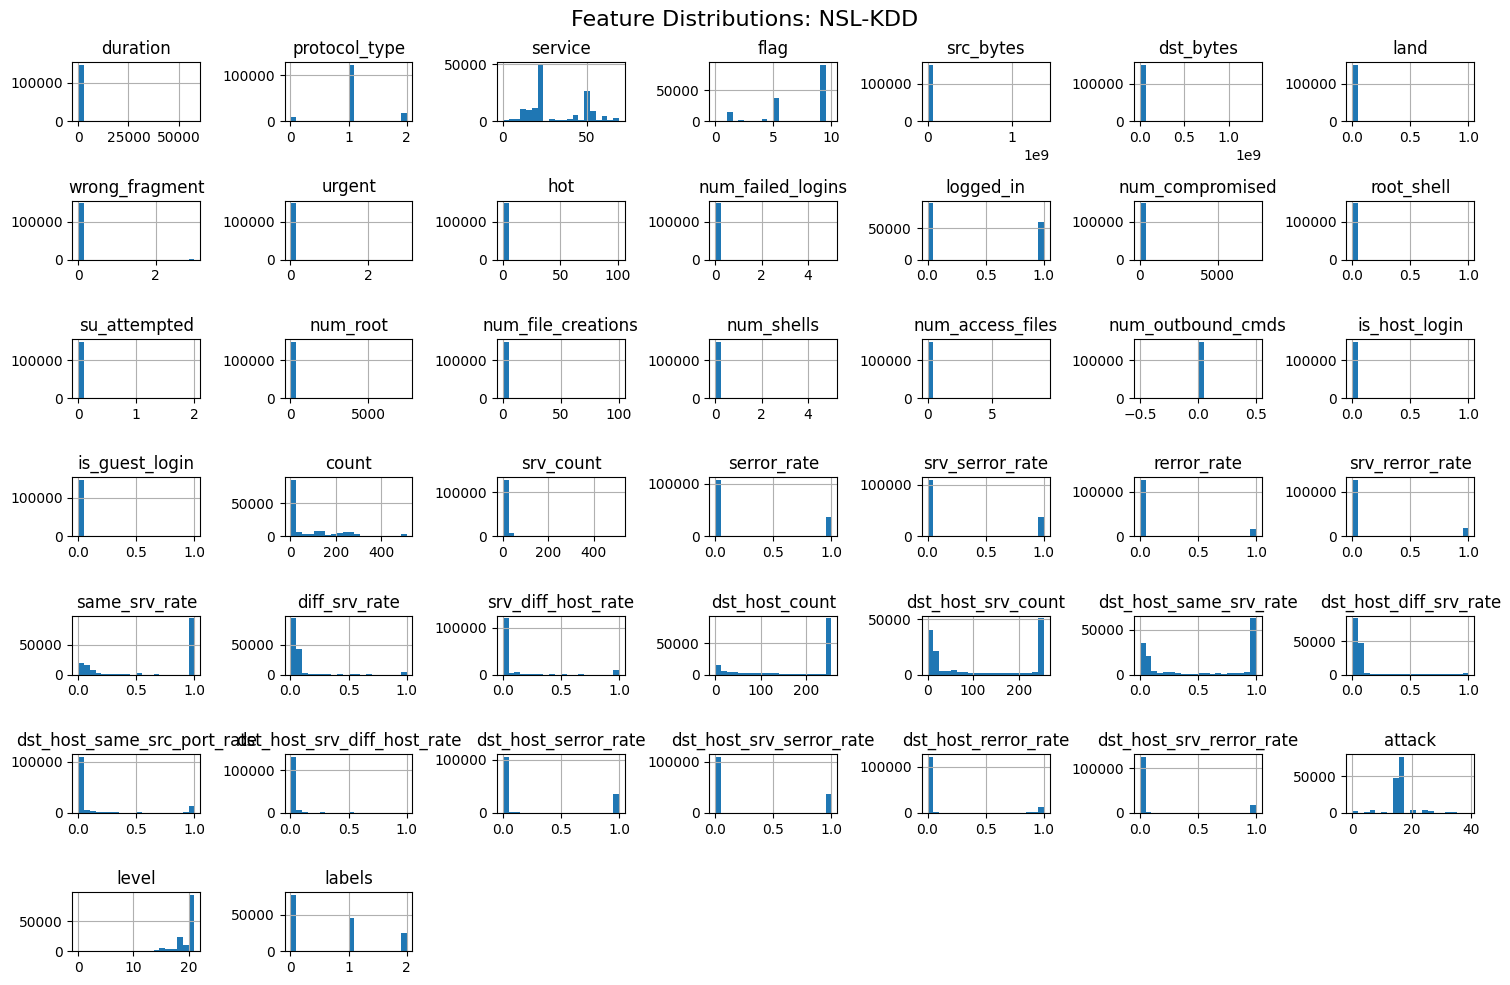

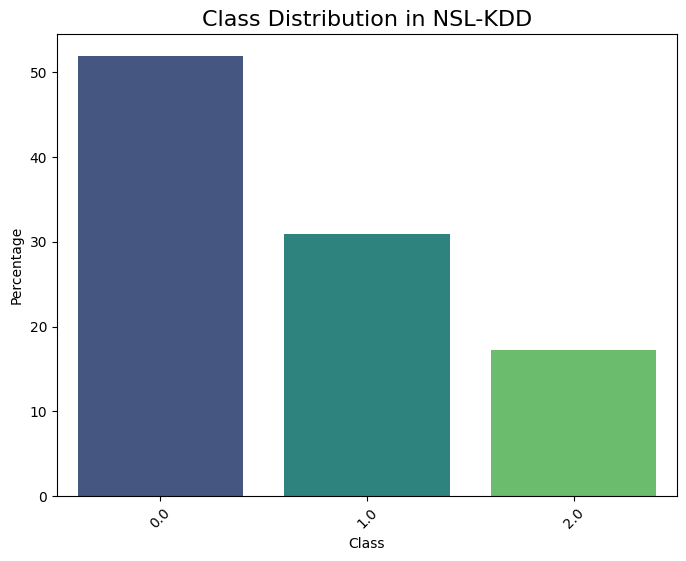

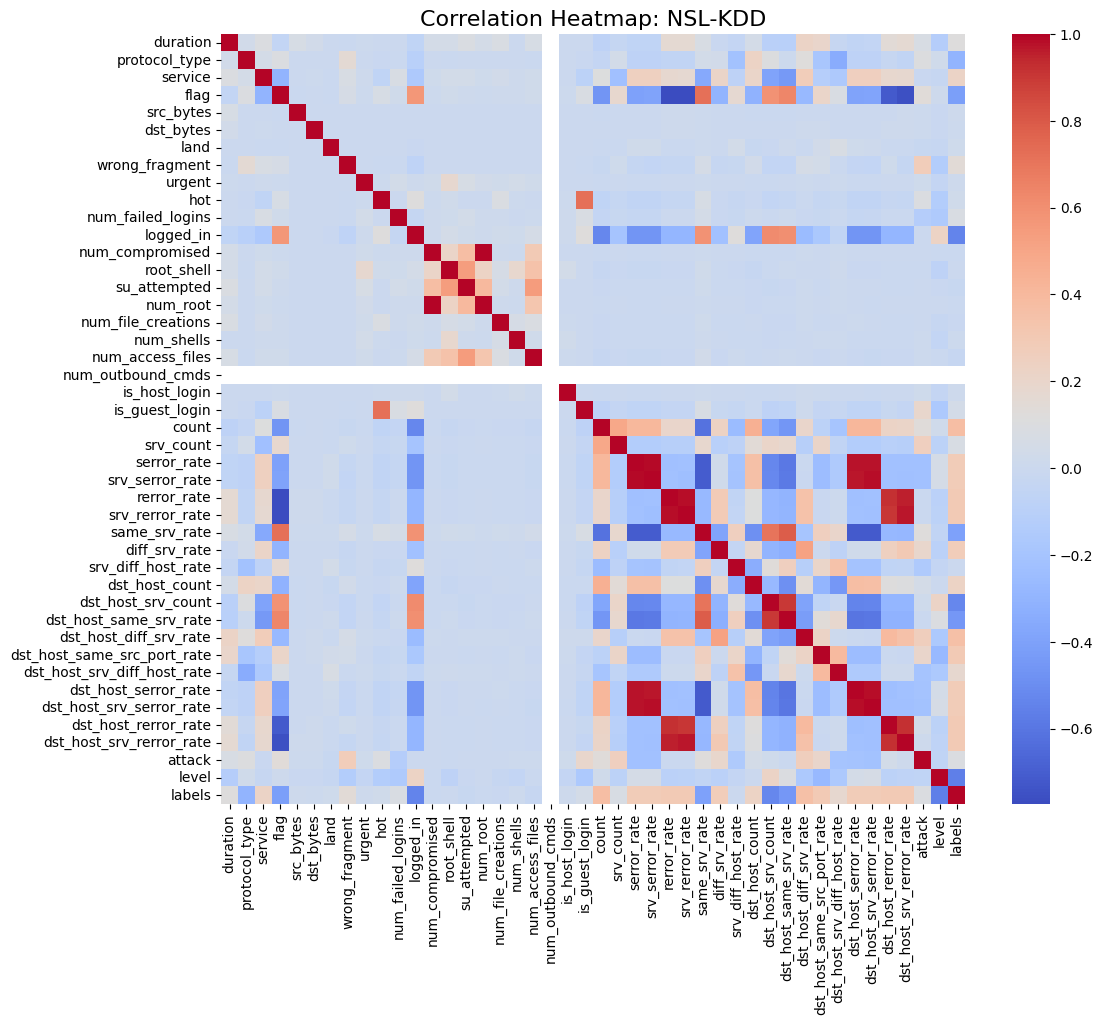

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

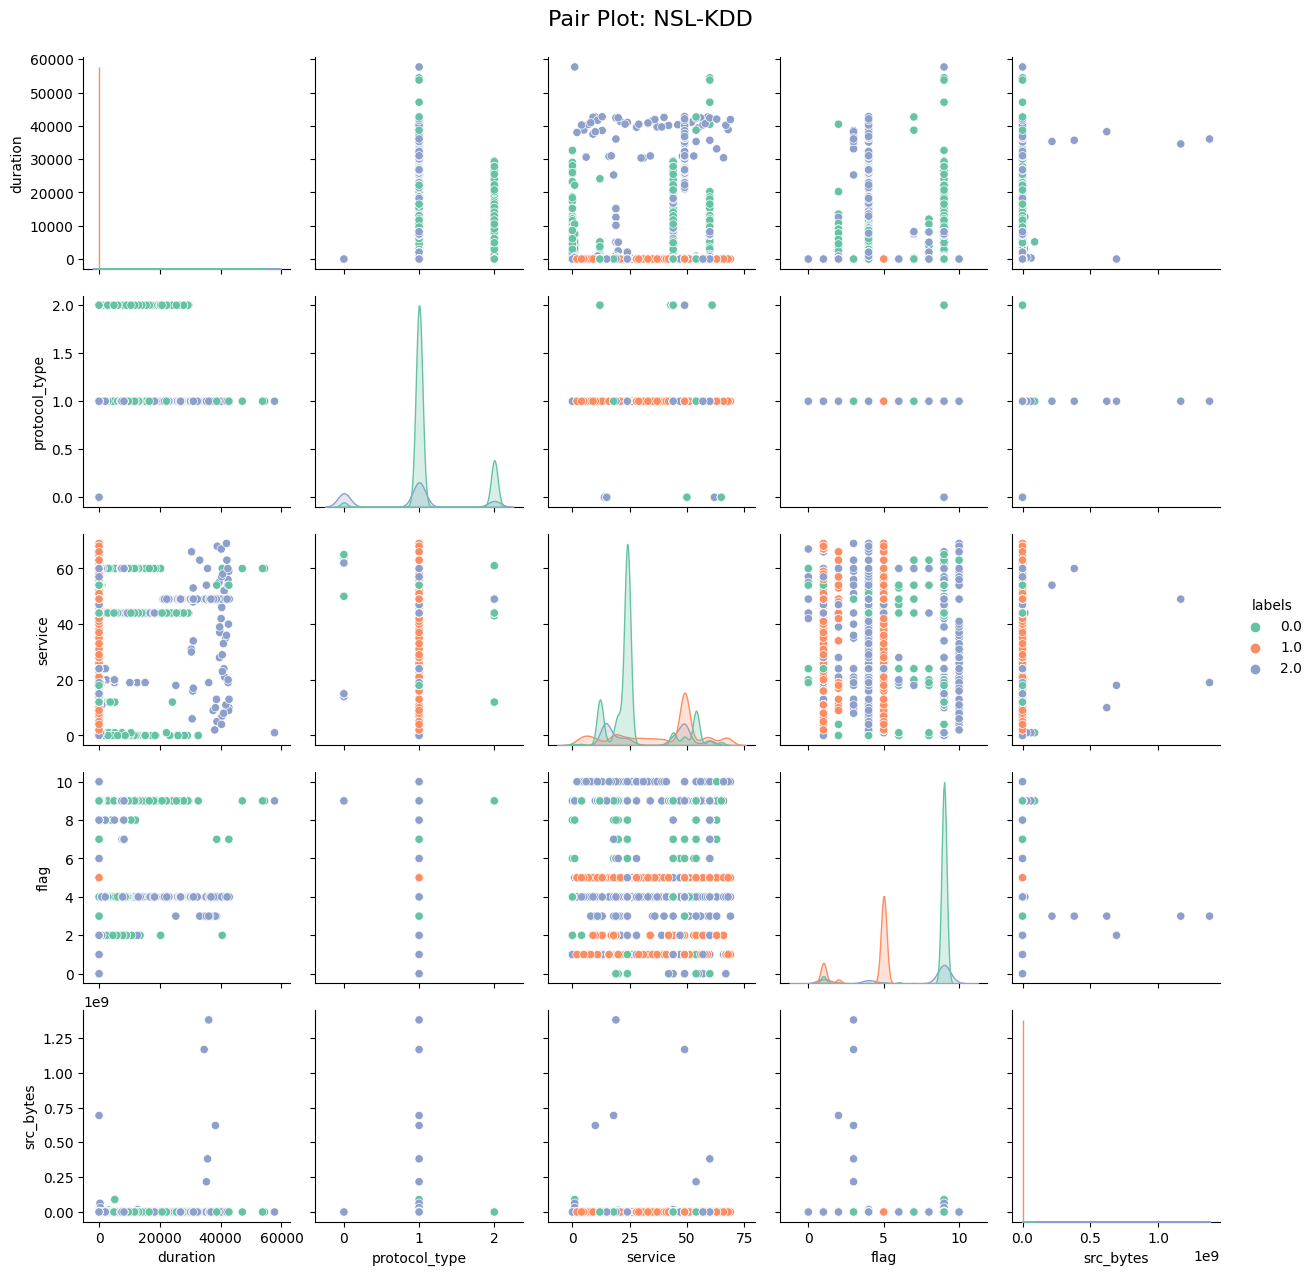


Processing dataset: UNSW-NB15
Shape of UNSW-NB15: (2540047, 49)
Number of unique classes in 'label': 2
Columns in UNSW-NB15: Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'label'],
      dtype='object', name='Name')
Target column: label


<Figure size 1200x600 with 0 Axes>

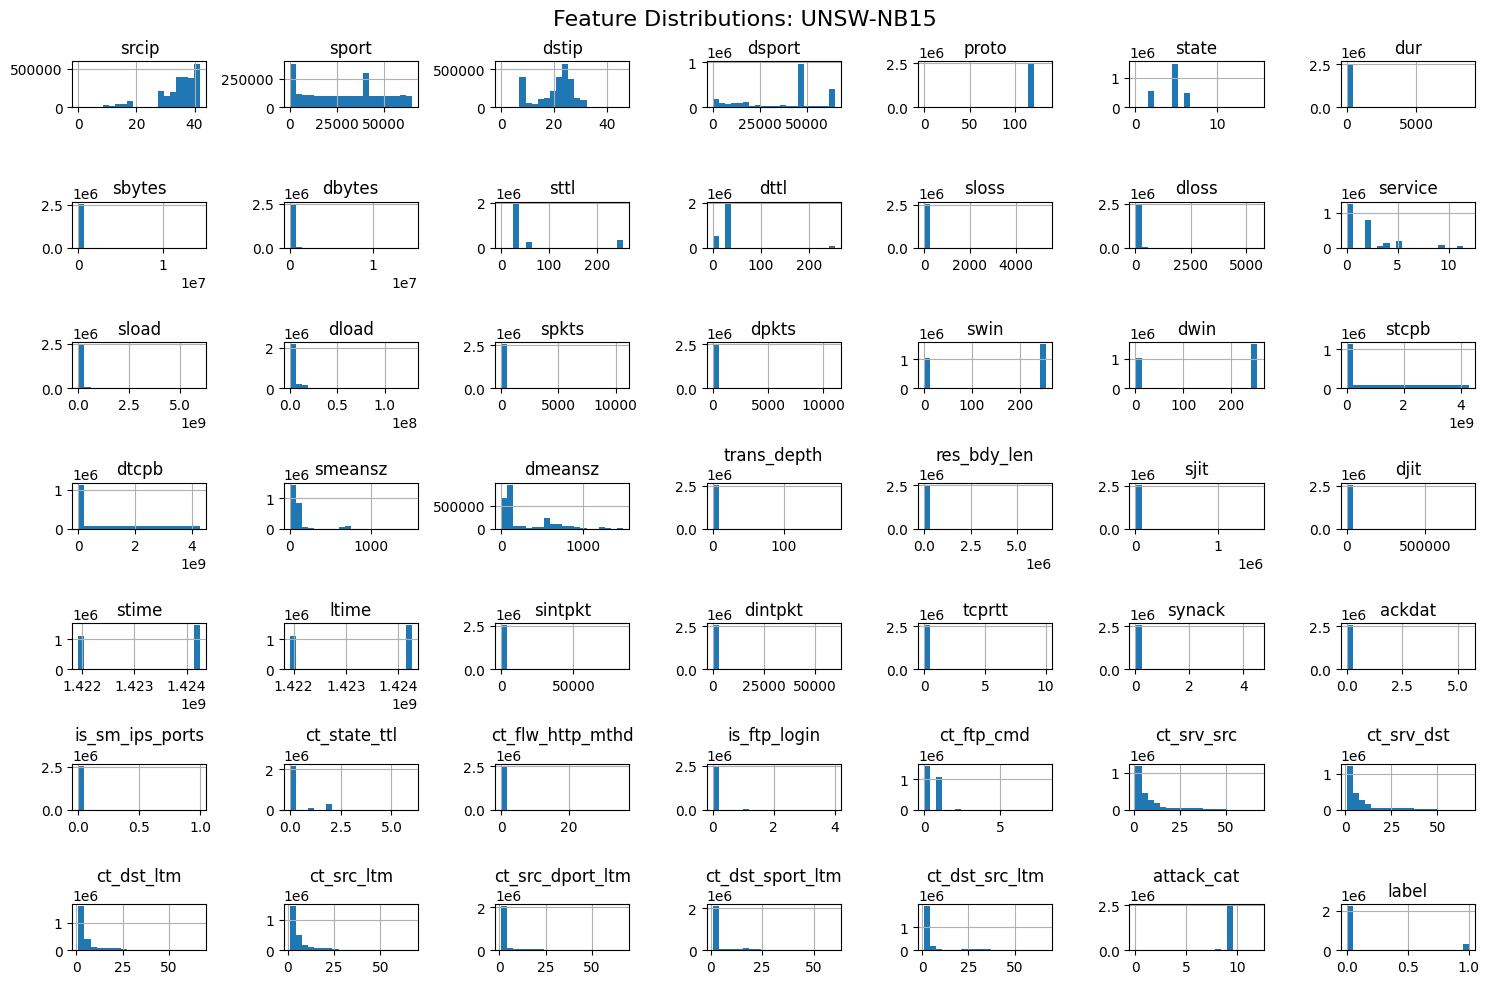

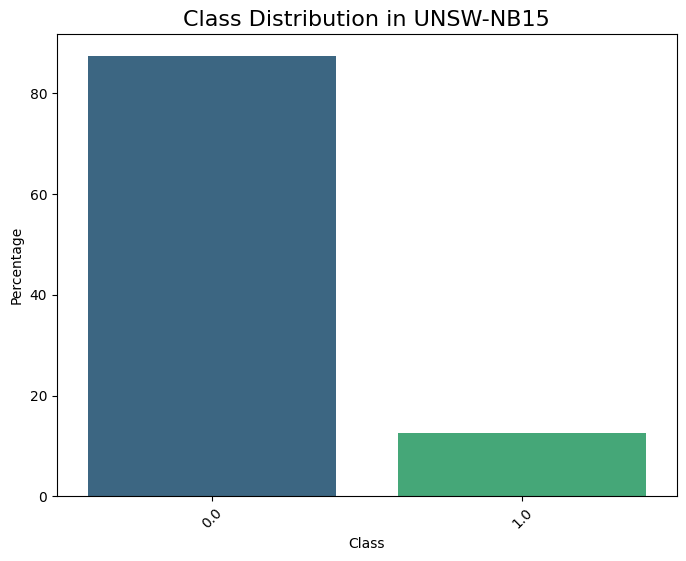

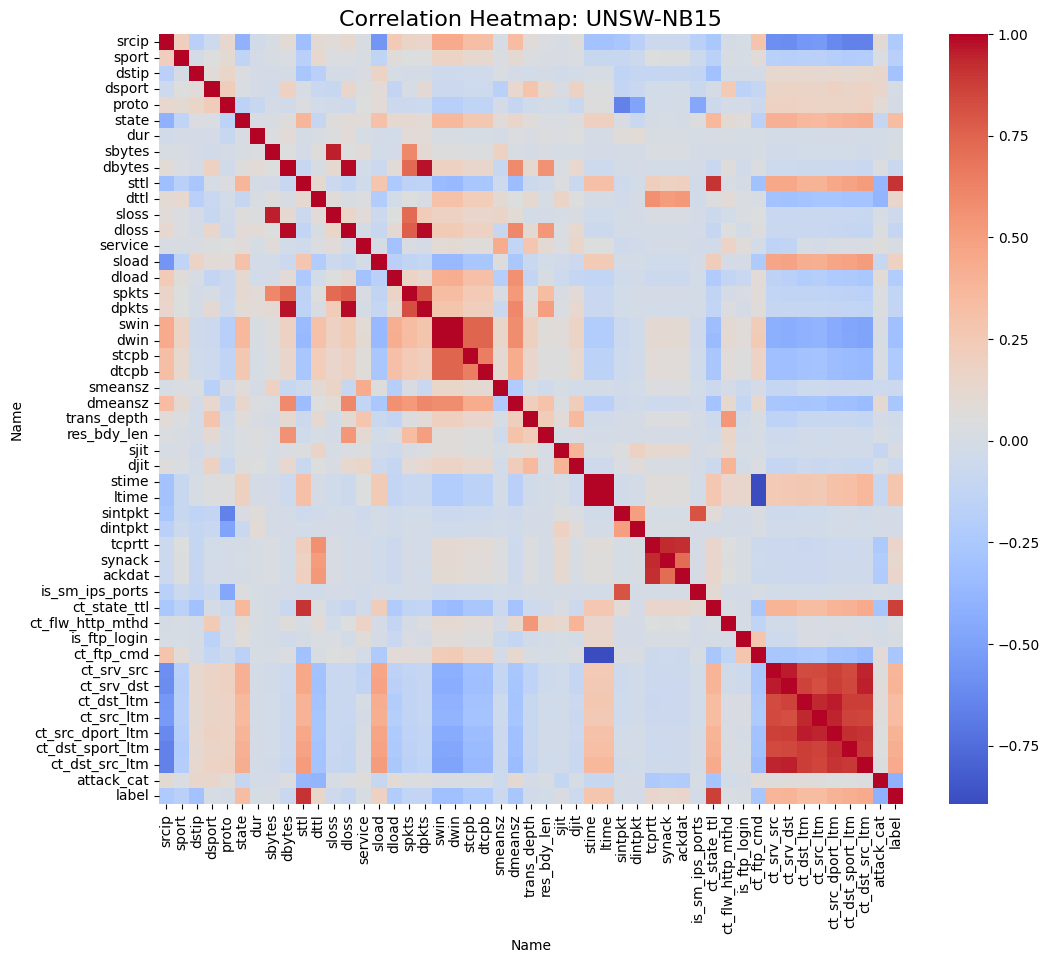

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

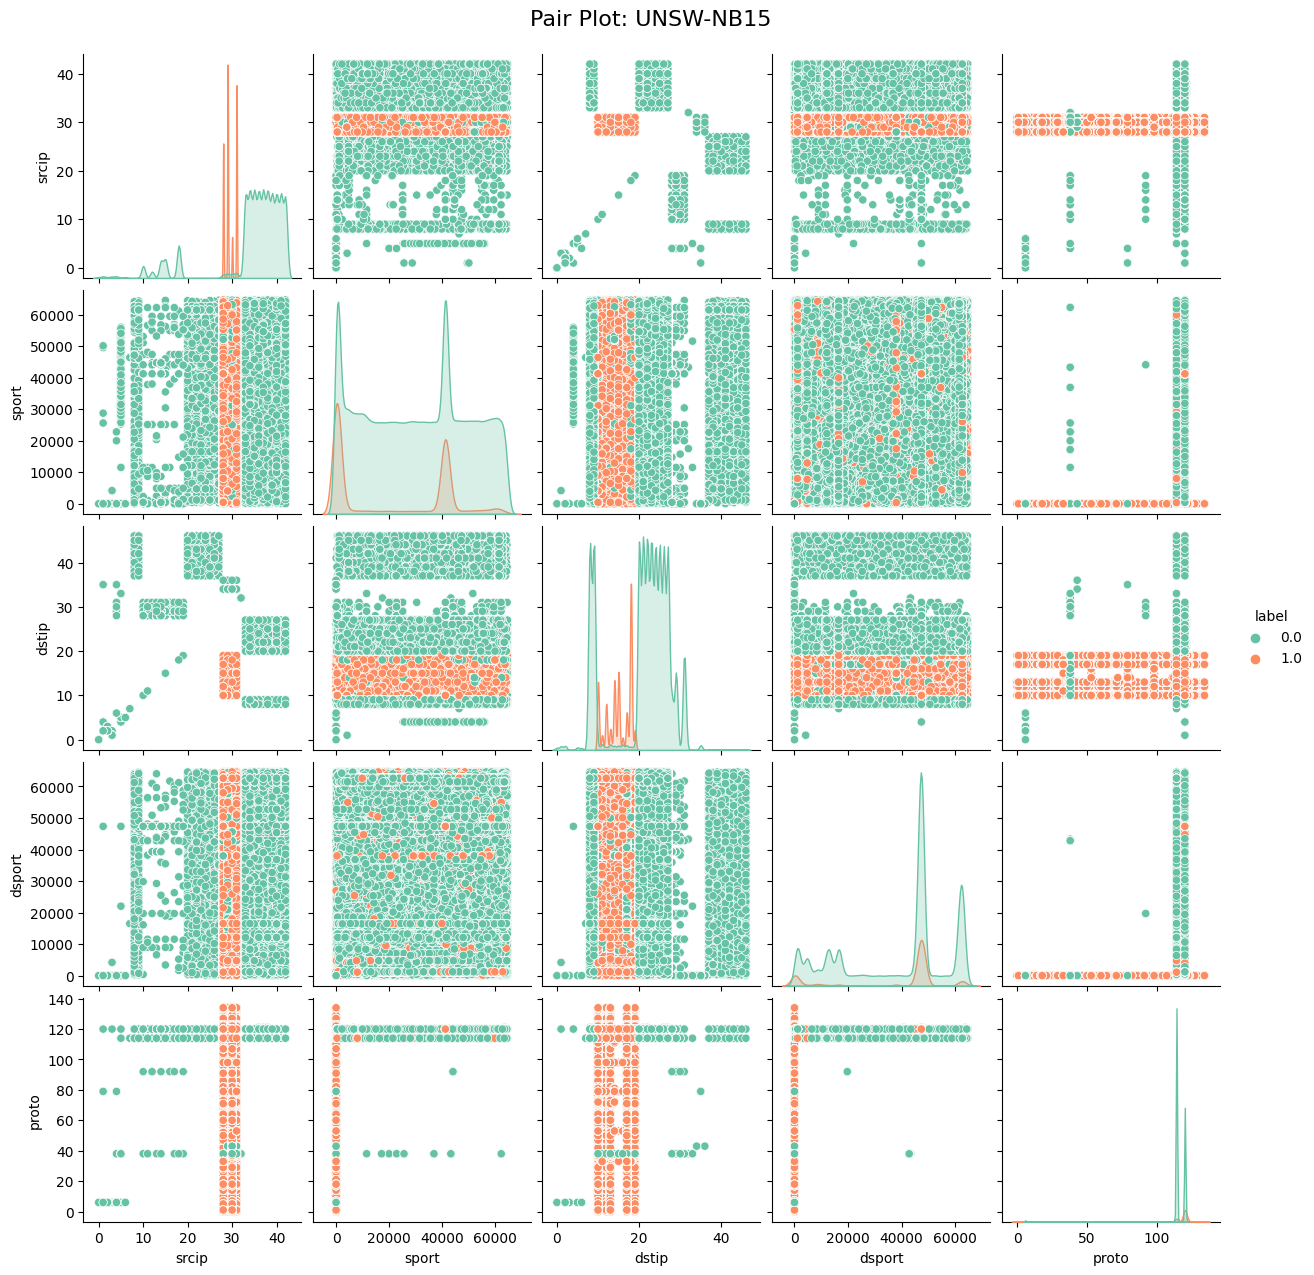


Processing dataset: CICIDS2017
Shape of CICIDS2017: (692703, 79)
Number of unique classes in ' Label': 6
Columns in CICIDS2017: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
  

<Figure size 1200x600 with 0 Axes>

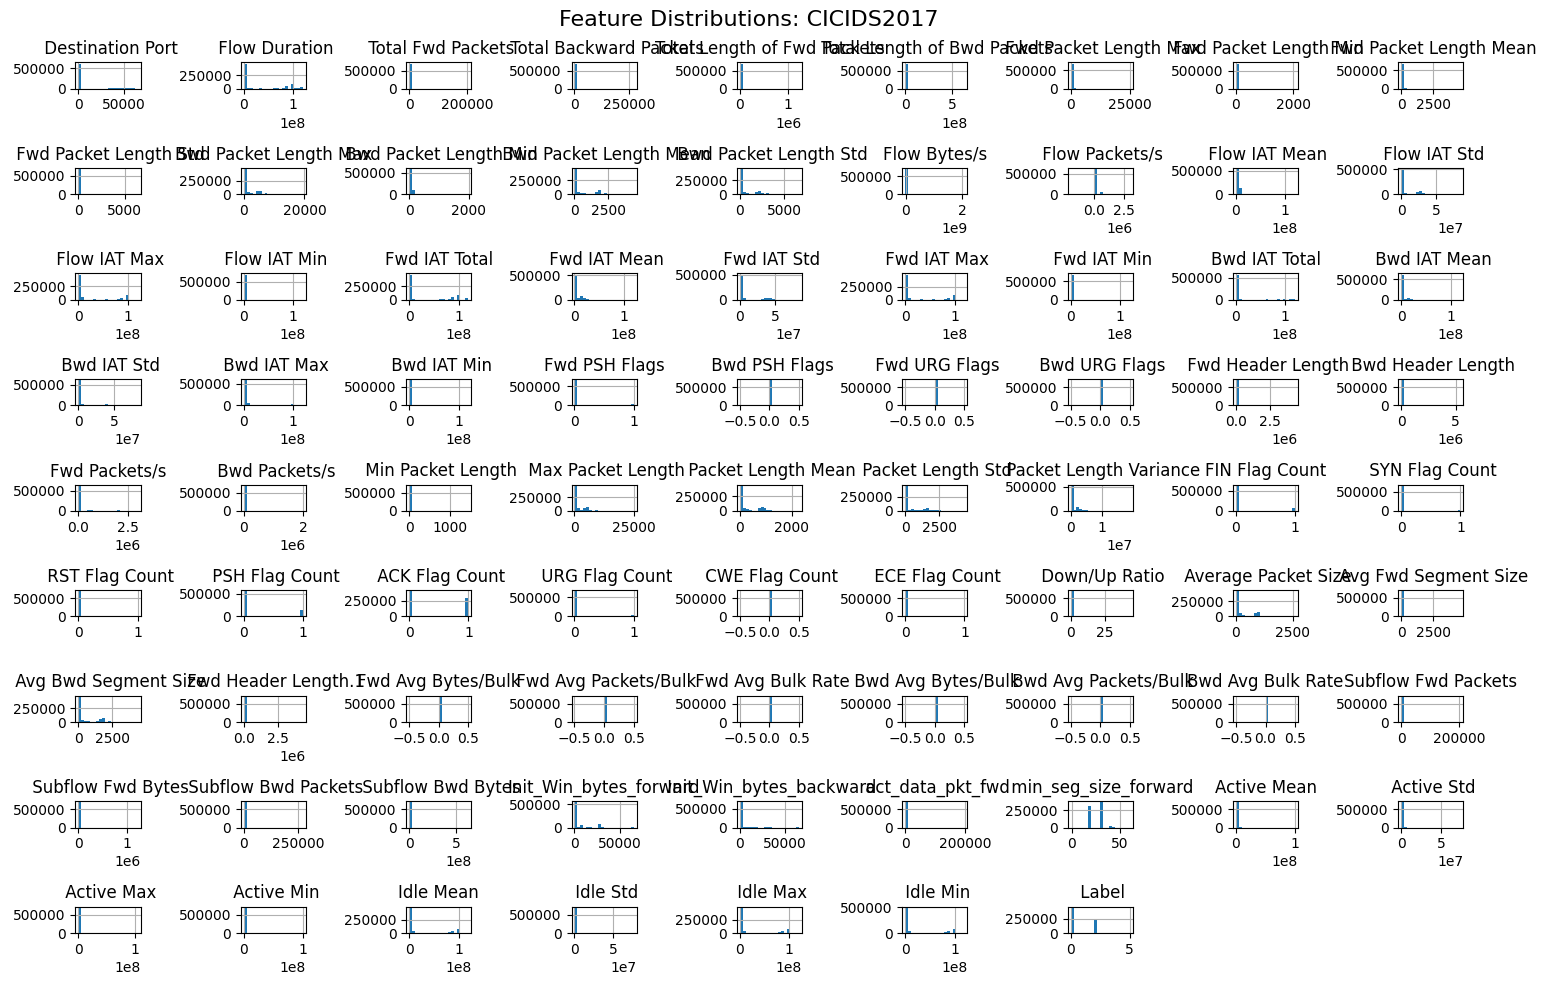

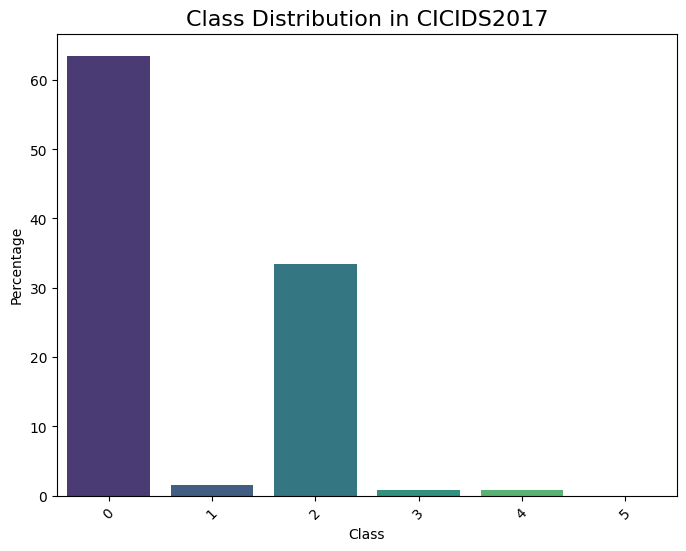

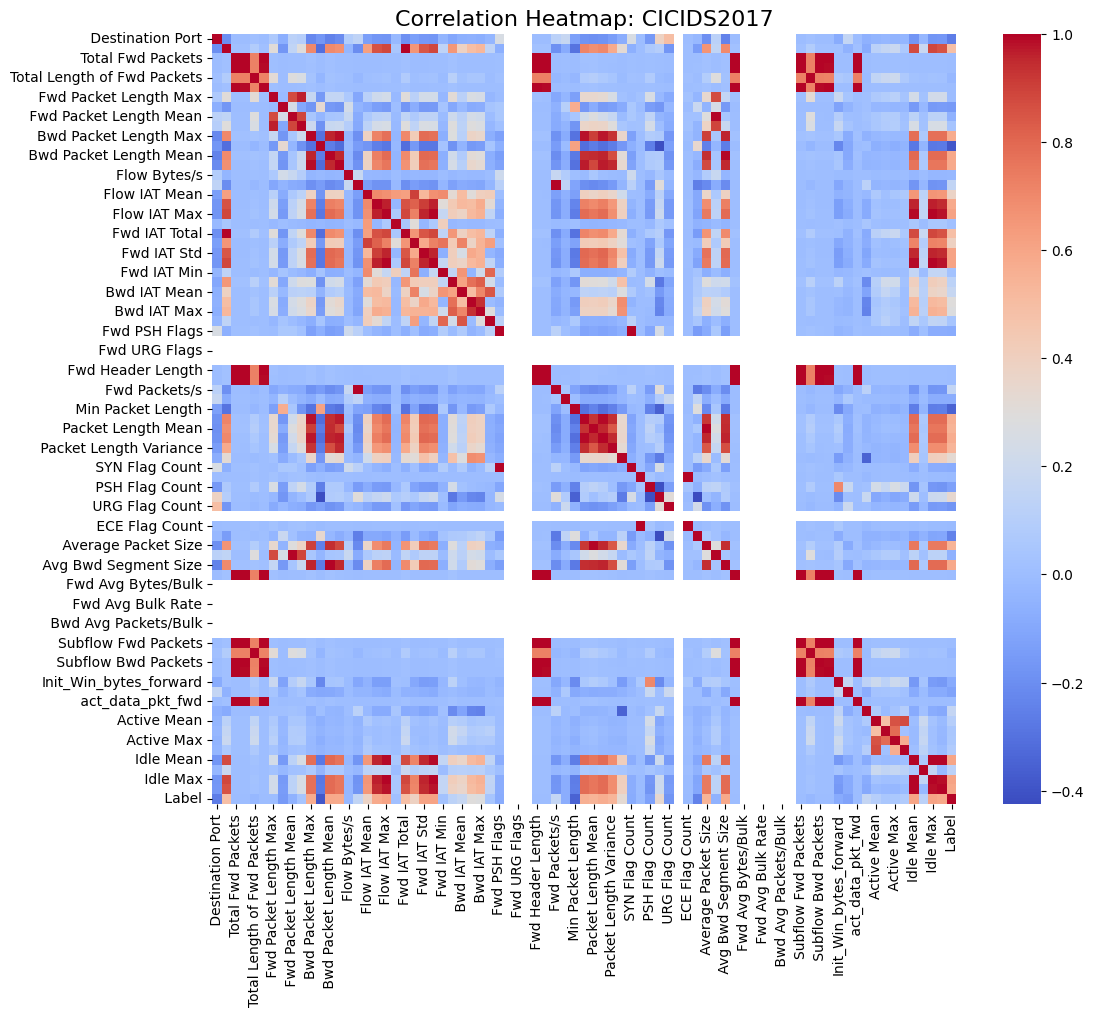

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

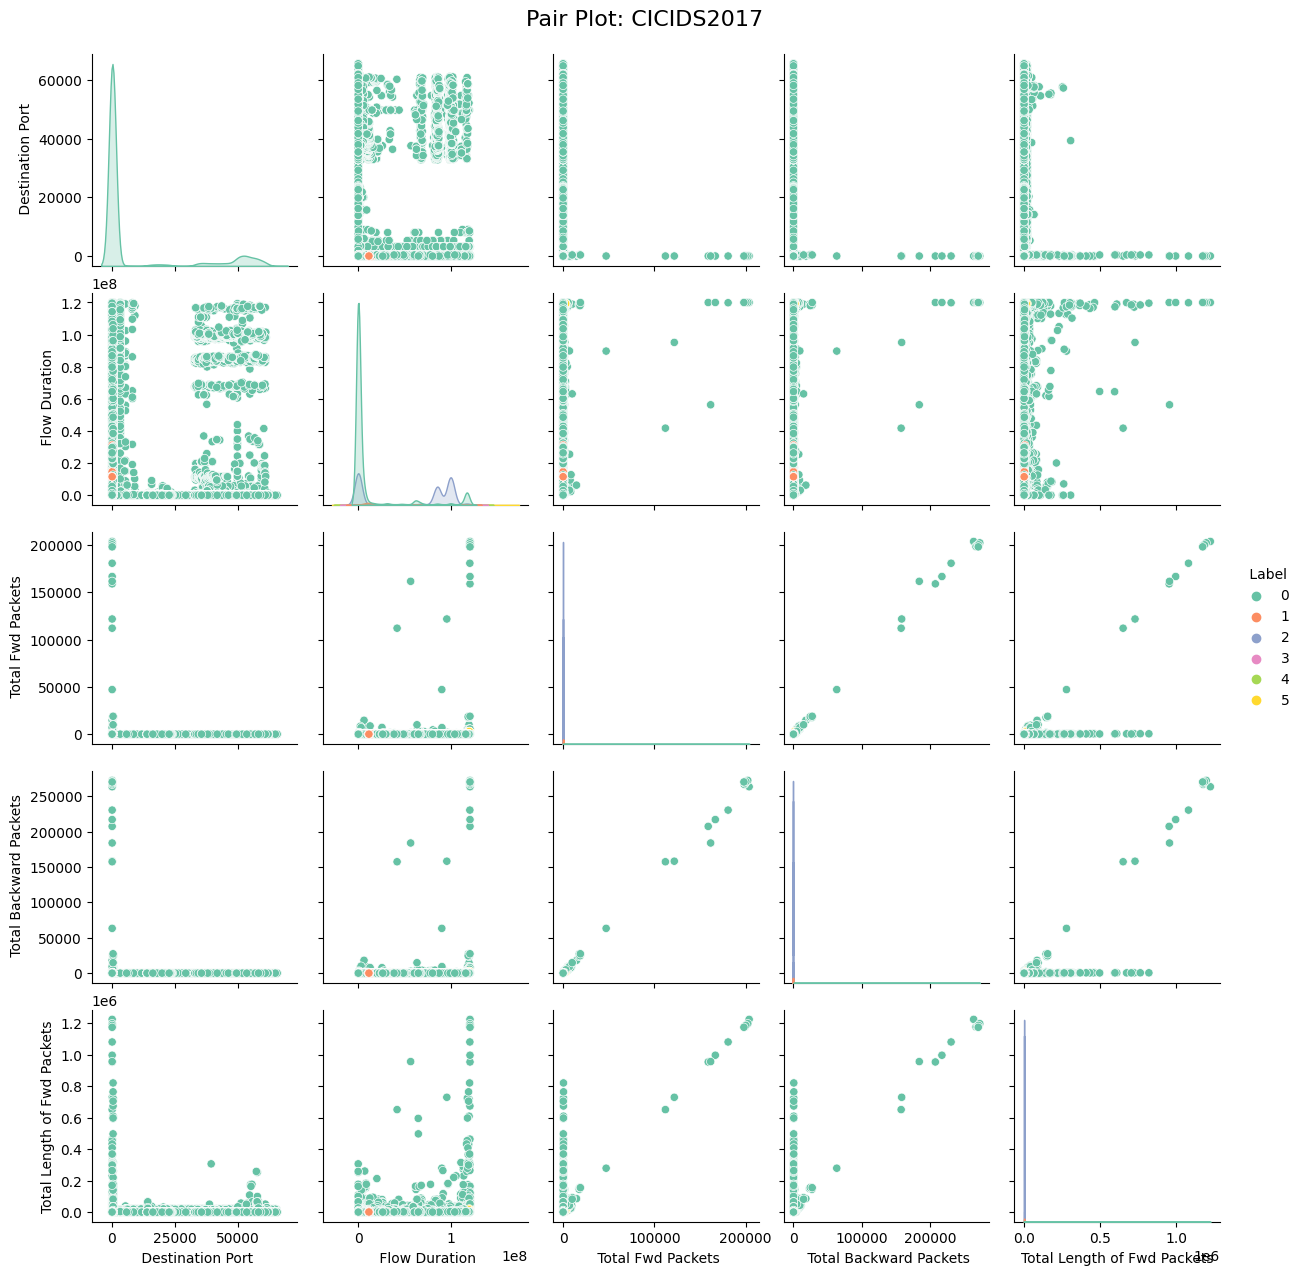


Processing dataset: KDD CUP 99
Shape of KDD CUP 99: (494021, 43)
Number of unique classes in 'Attack Type': 5
Columns in KDD CUP 99: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

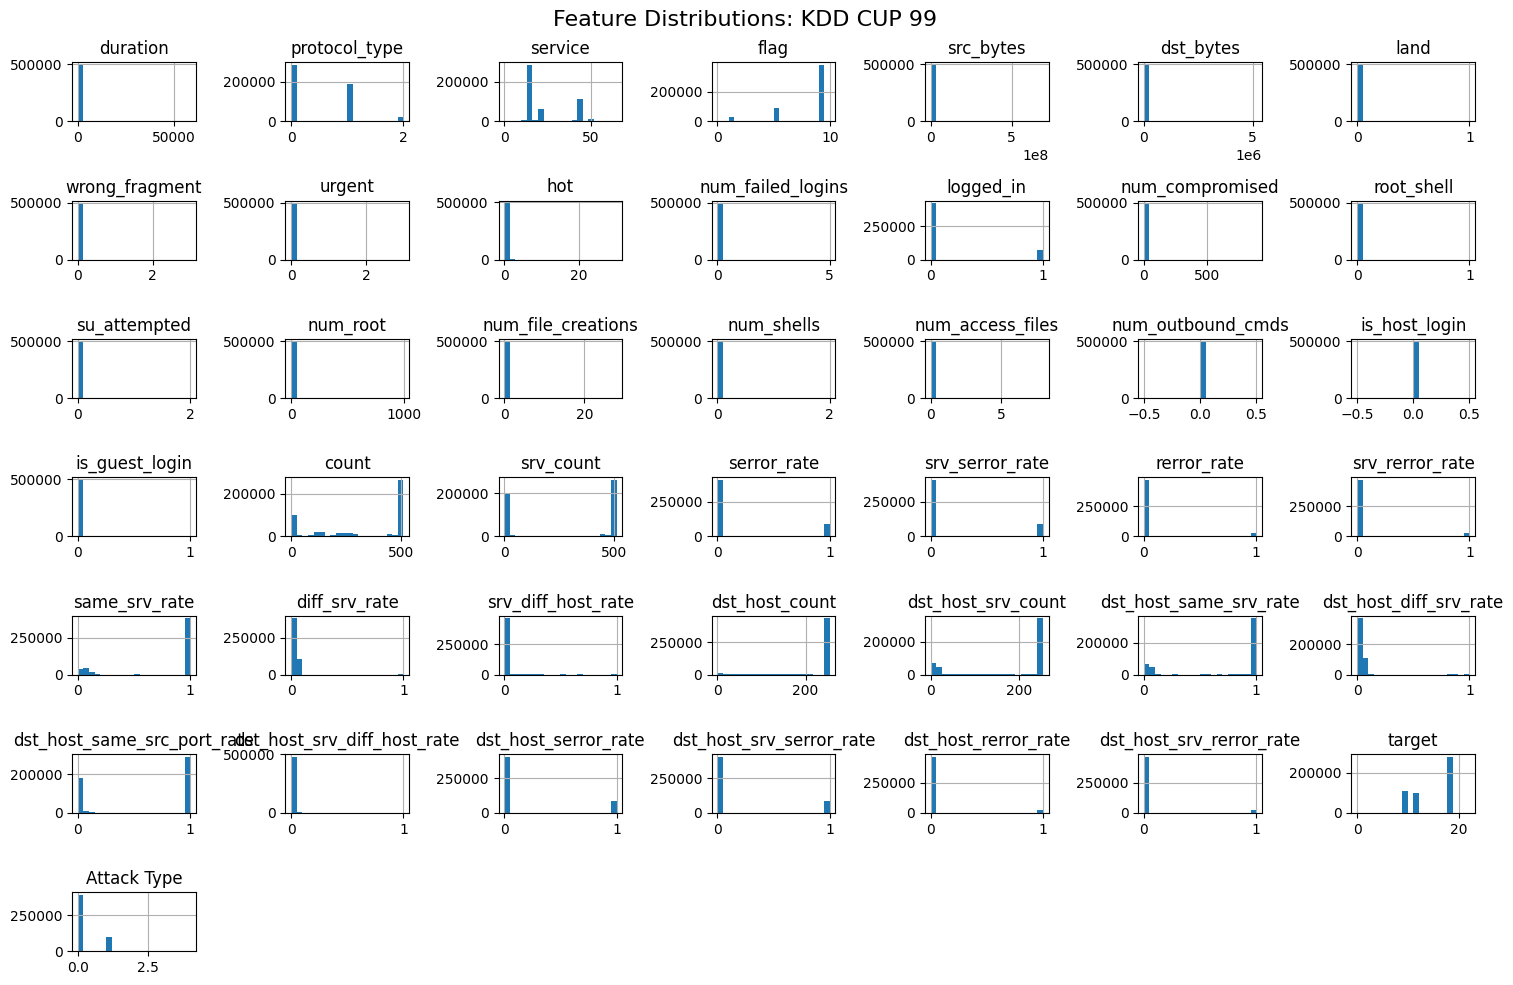

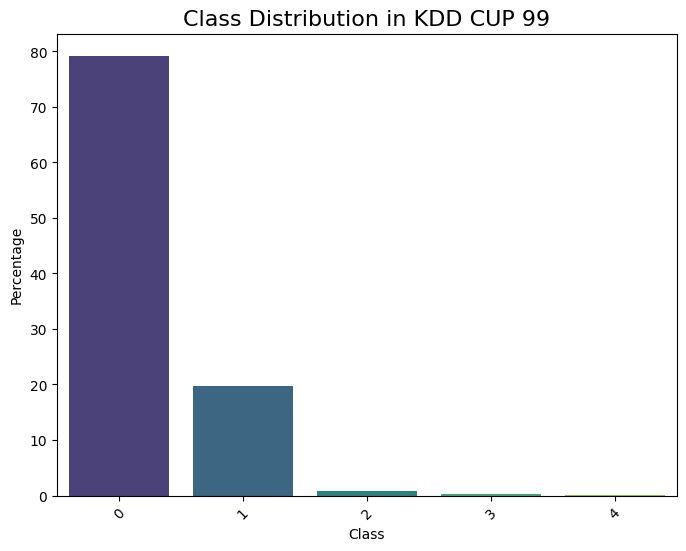

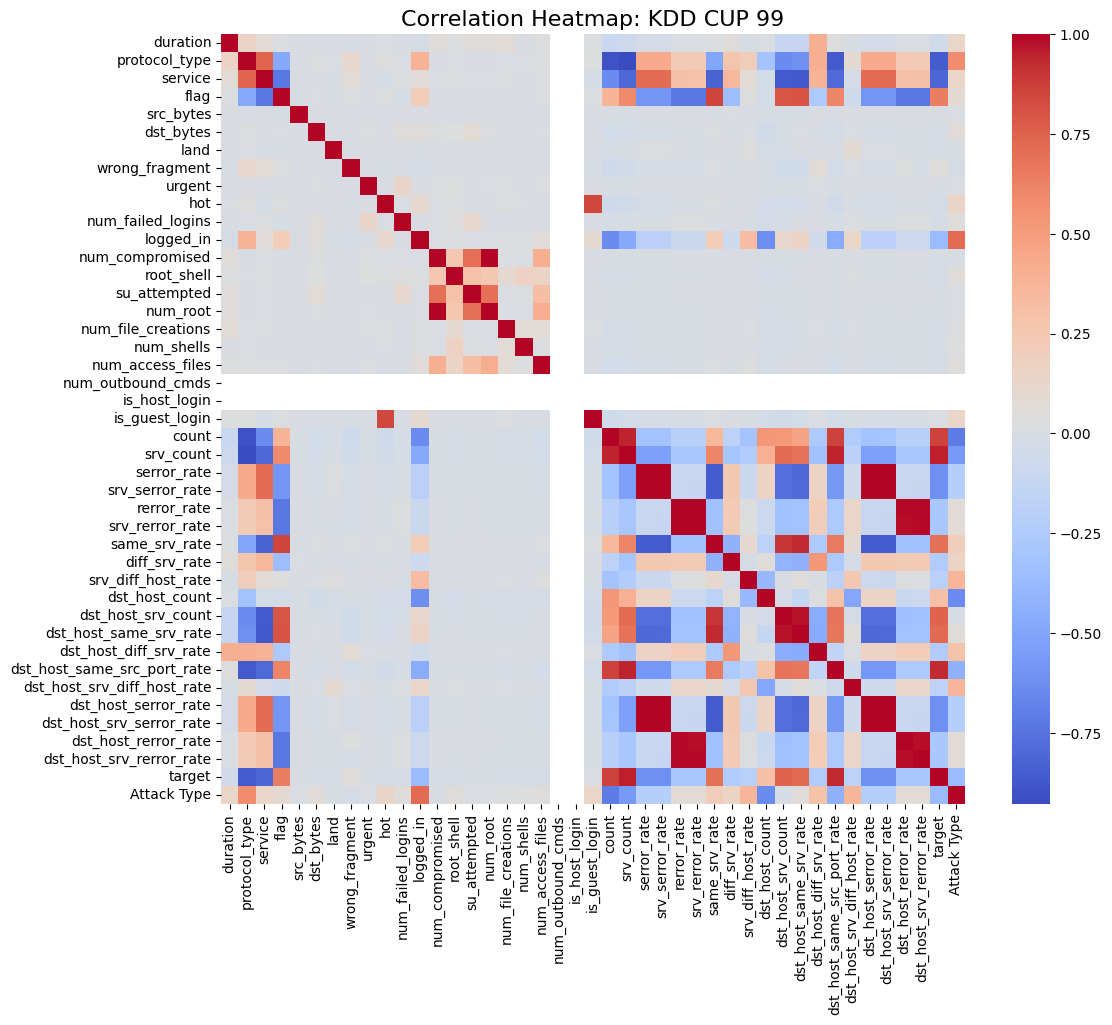

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

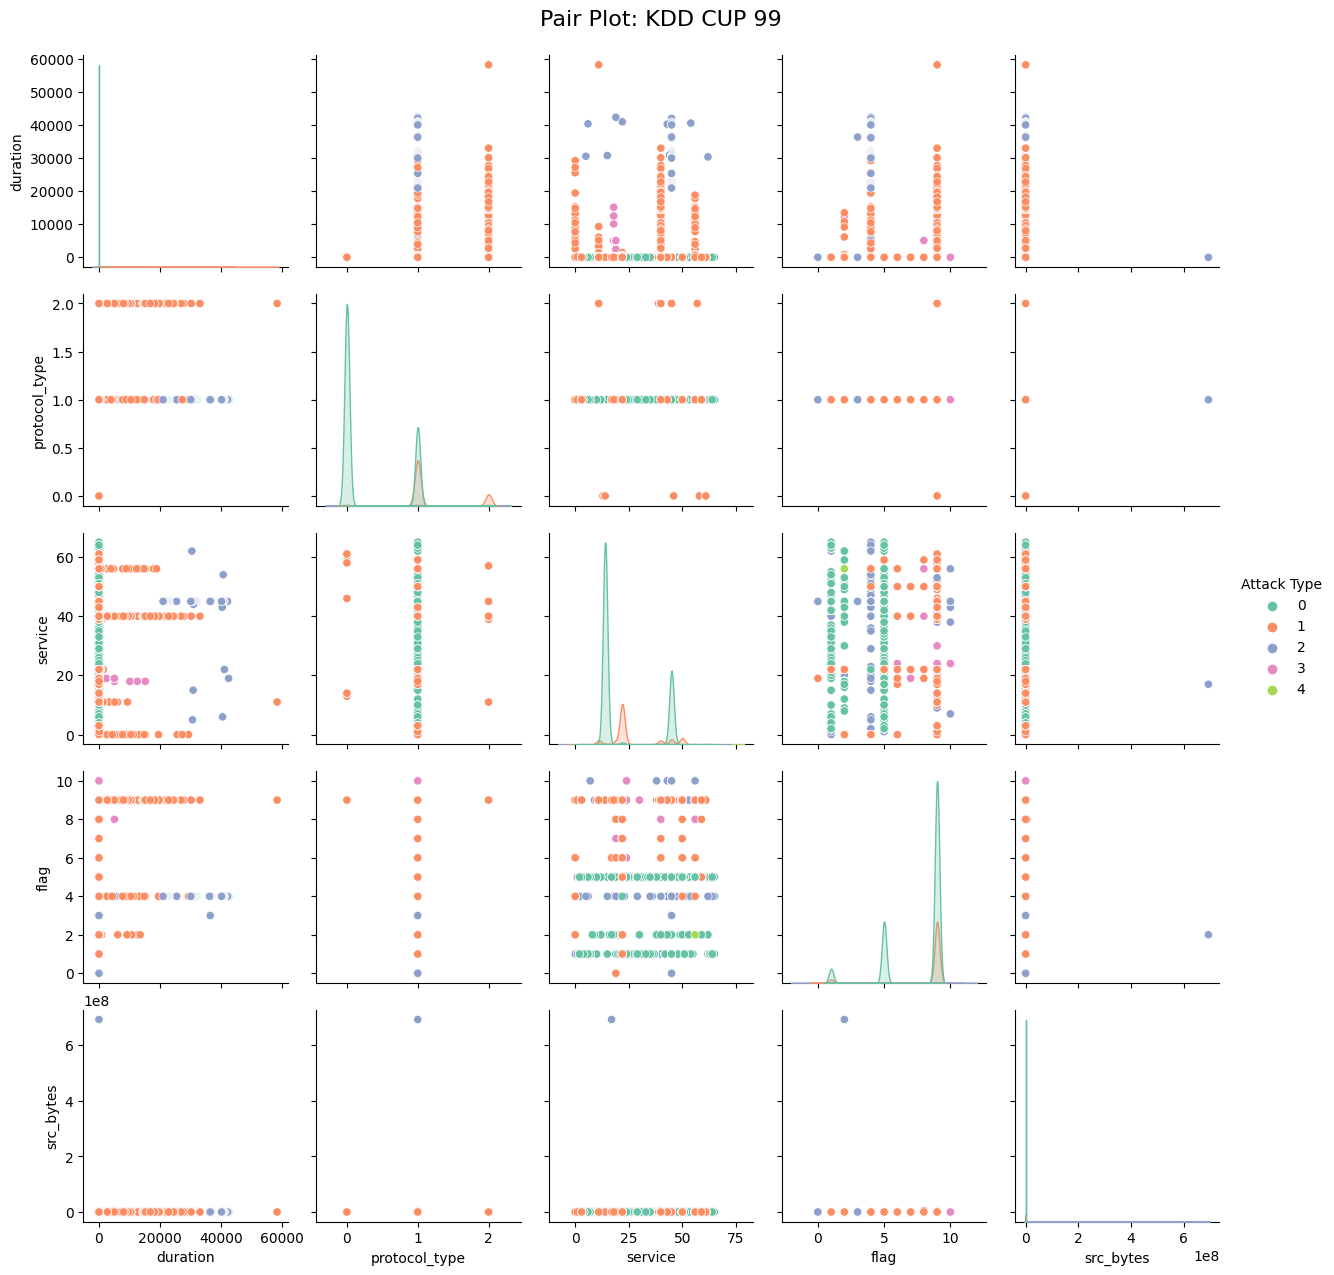

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_dataset(df, dataset_name, target_col):
    """
    Generates insightful figures for EDA.
    """
    # Check if target_col is in the DataFrame
    if target_col not in df.columns:
        raise KeyError(f"Target column '{target_col}' not found in the dataset '{dataset_name}'.")

    print(f"Columns in {dataset_name}: {df.columns}")
    print(f"Target column: {target_col}")

    # Plot distribution of numeric features
    numeric_cols = df.select_dtypes(include=["number"]).columns
    plt.figure(figsize=(15, 8))
    df[numeric_cols].hist(bins=20, figsize=(15, 10))
    plt.suptitle(f"Feature Distributions: {dataset_name}", fontsize=16)
    plt.tight_layout()
    plt.savefig(f"{dataset_name}_feature_distributions.png")
    plt.show()

    # Class distribution
    plt.figure(figsize=(8, 6))
    class_counts = df[target_col].value_counts(normalize=True) * 100  # Convert to percentage
    sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
    plt.title(f"Class Distribution in {dataset_name}", fontsize=16)
    plt.xlabel("Class")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.savefig(f"{dataset_name}_class_distribution.png")
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
    plt.title(f"Correlation Heatmap: {dataset_name}", fontsize=16)
    plt.savefig(f"{dataset_name}_correlation_heatmap.png")
    plt.show()

    # Pair plot for a subset of features
    sampled_features = [col for col in numeric_cols if col in df.columns][:5]  # Limit to 5 features
    if target_col not in df.columns:
        raise KeyError(f"Target column '{target_col}' not found in {dataset_name}.")
    sampled_df = df[sampled_features + [target_col]]
    sns.pairplot(sampled_df, hue=target_col, palette="Set2", diag_kind="kde")
    plt.suptitle(f"Pair Plot: {dataset_name}", y=1.02, fontsize=16)
    plt.savefig(f"{dataset_name}_pairplot.png")
    plt.show()


# Process datasets and visualize
for dataset_name, path in datasets.items():
    print(f"\nProcessing dataset: {dataset_name}")
    target_col = target_columns[dataset_name]

    # Preprocess dataset
    df = preprocess_data(path)
    print(f"Shape of {dataset_name}: {df.shape}")
    print(f"Number of unique classes in '{target_col}': {len(df[target_col].unique())}")

    # Visualize dataset
    visualize_dataset(df, dataset_name, target_col)
